<a href="https://colab.research.google.com/github/ilwad123/cyber-data-analytics-investigation/blob/main/22014624_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2024-25

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 12th DECEMBER @ 14:00**.

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [ ]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'TechNovaInnovations'


In [ ]:
from google.colab import drive
import pandas as pd

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the dataset path
dataset_path = '/content/drive/My Drive/Colab Notebooks/TechNovaInnovations/email_data.csv'

# Step 3: Load the dataset
try:
    email_data = pd.read_csv(dataset_path, parse_dates=True, index_col=0)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at: {dataset_path}. Please check the file path.")

# Step 4: Verify dataset
print(email_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-115-2efd7ba47e2a>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv(dataset_path, parse_dates=True, index_col=0)


Dataset loaded successfully!
                     datetime                            sender  \
0  2018-01-01 00:41:45.500091  usr-vdy@technova-innovations.net   
1  2018-01-01 01:27:00.883256  usr-vdy@technova-innovations.net   
2  2018-01-01 02:09:41.590869  usr-vdy@technova-innovations.net   
3  2018-01-01 02:32:49.851613  usr-eqs@technova-innovations.net   
4  2018-01-01 02:38:44.793534  usr-eqs@technova-innovations.net   

                          recipient  
0  usr-qas@technova-innovations.net  
1  usr-rxo@technova-innovations.net  
2  usr-lok@technova-innovations.net  
3  usr-lok@technova-innovations.net  
4  usr-dao@technova-innovations.net  


### Function for loading data - do not change

In [ ]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04',
                    'CyberWaveSolutions', 'TechNovaInnovations', 'QuantumByteSystems', 'NexGenCyberTech']
    if DATASET in dataset_list:
        email_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET  +'/employee_data.csv',parse_dates=True, index_col=0)

        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

<ipython-input-116-b0f33ea1c8b0>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
<ipython-input-116-b0f33ea1c8b0>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
<ipython-input-116-b0f33ea1c8b0>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/' + DATAS

In [ ]:
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/TechNovaInnovations'))

['email_data.csv', 'employee_data.csv', 'login_data.csv', 'usb_data.csv', 'file_data.csv', 'web_data.csv']


### The following code samples may be useful to aid your investigation

In [ ]:
# This shows the employee_data DataFrame
employee_data

user       role                             email    pc
0   usr-bcc  Technical  usr-bcc@technova-innovations.net   pc0
1   usr-fxz      Legal  usr-fxz@technova-innovations.net   pc1
2   usr-jit         HR  usr-jit@technova-innovations.net   pc2
3   usr-bsv         HR  usr-bsv@technova-innovations.net   pc3
4   usr-num   Security  usr-num@technova-innovations.net   pc4
..      ...        ...                               ...   ...
95  usr-vzu    Finance  usr-vzu@technova-innovations.net  pc95
96  usr-jmh      Legal  usr-jmh@technova-innovations.net  pc96
97  usr-vko         HR  usr-vko@technova-innovations.net  pc97
98  usr-jde   Director  usr-jde@technova-innovations.net  pc98
99  usr-ynd  Technical  usr-ynd@technova-innovations.net  pc99

[100 rows x 4 columns]

In [ ]:
# This shows the login_data DataFrame
usb_data

datetime     user      action    pc
0     2018-01-01 04:30:19.731328  usr-biy  usb_insert  pc44
1     2018-01-01 05:02:28.315951  usr-biy  usb_remove  pc44
2     2018-01-01 05:11:05.278974  usr-lok  usb_insert   pc7
3     2018-01-01 05:38:11.578900  usr-rez  usb_insert  pc93
4     2018-01-01 05:45:28.970372  usr-ynd  usb_insert  pc99
...                          ...      ...         ...   ...
69813 2018-06-30 22:06:10.230863  usr-ynd  usb_remove  pc99
69814 2018-06-30 22:08:26.685226  usr-rez  usb_insert  pc93
69815 2018-06-30 22:11:32.962897  usr-rez  usb_remove  pc93
69816 2018-06-30 22:55:21.024534  usr-bcc  usb_insert   pc0
69817 2018-06-30 23:26:18.077186  usr-bcc  usb_remove   pc0

[69818 rows x 4 columns]

In [ ]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-nic']

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [ ]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-nic'])]

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [ ]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Technical', 'Legal', 'HR', 'Security', 'Services', 'Director',
       'Finance'], dtype=object)

In [ ]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [ ]:
# List all usernames that belong to the job role Finance
len(employee_data['user'].unique())


99

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

   index  value
0      9    434
   index  value
0     17    434


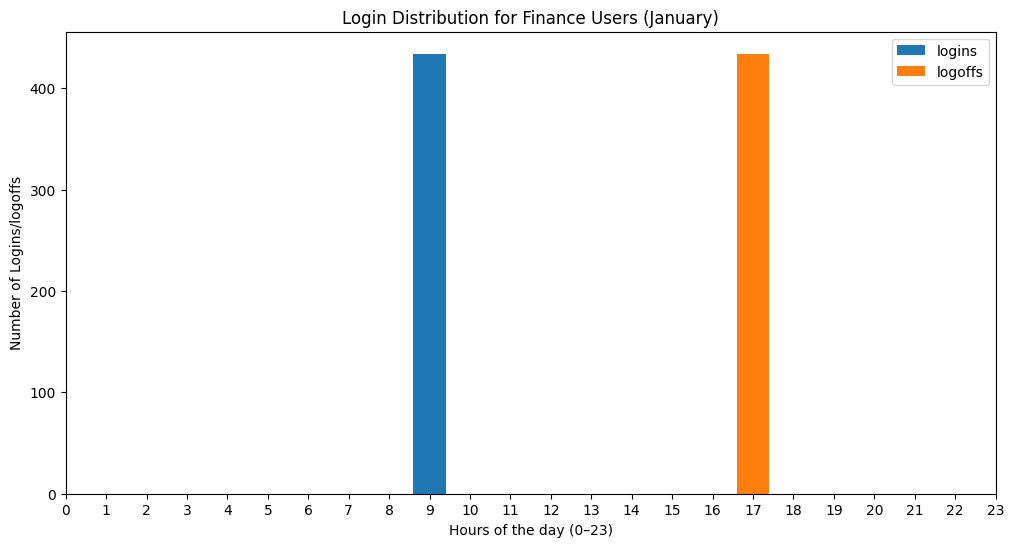

Most Login time: 9
Most Logoff time: 17


In [ ]:

######### ADD YOUR CODE HERE ##########

#brings up set of users in Finane
finance_jan=user_set['Finance']
finance_login=login_data[login_data['user'].isin(finance_jan)]##finance users logins
january_df = finance_login[finance_login['datetime'].dt.month == 1].copy()
#get the hours of the january month
january_df['hour'] = january_df['datetime'].dt.hour
login_counts = january_df[january_df['action'] == 'login']['hour'].value_counts().sort_index().reset_index()
login_counts = login_counts.set_axis(['index', 'value'], axis=1)
print(login_counts)

#counts how many users logoff by the hour and sorts it
logoff = january_df[january_df['action'] == 'logoff']['hour'].value_counts().sort_index().reset_index()
logoff = logoff.set_axis(['index', 'value'], axis=1)
print(logoff)
# Create the bar chart
fig = plt.figure(figsize=(12, 6))
plt.bar(login_counts['index'],login_counts['value'],label='logins')
plt.bar(logoff['index'],logoff['value'],label='logoffs')
plt.xlabel('Hours of the day (0–23)')
plt.ylabel('Number of Logins/logoffs')
plt.title('Login Distribution for Finance Users (January)')
plt.xticks(range(24))
plt.legend()
plt.show()


print(f"Most Login time:",login_counts['index'][login_counts['value'].idxmax()])
print(f"Most Logoff time:",logoff['index'][logoff['value'].idxmax()])







### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



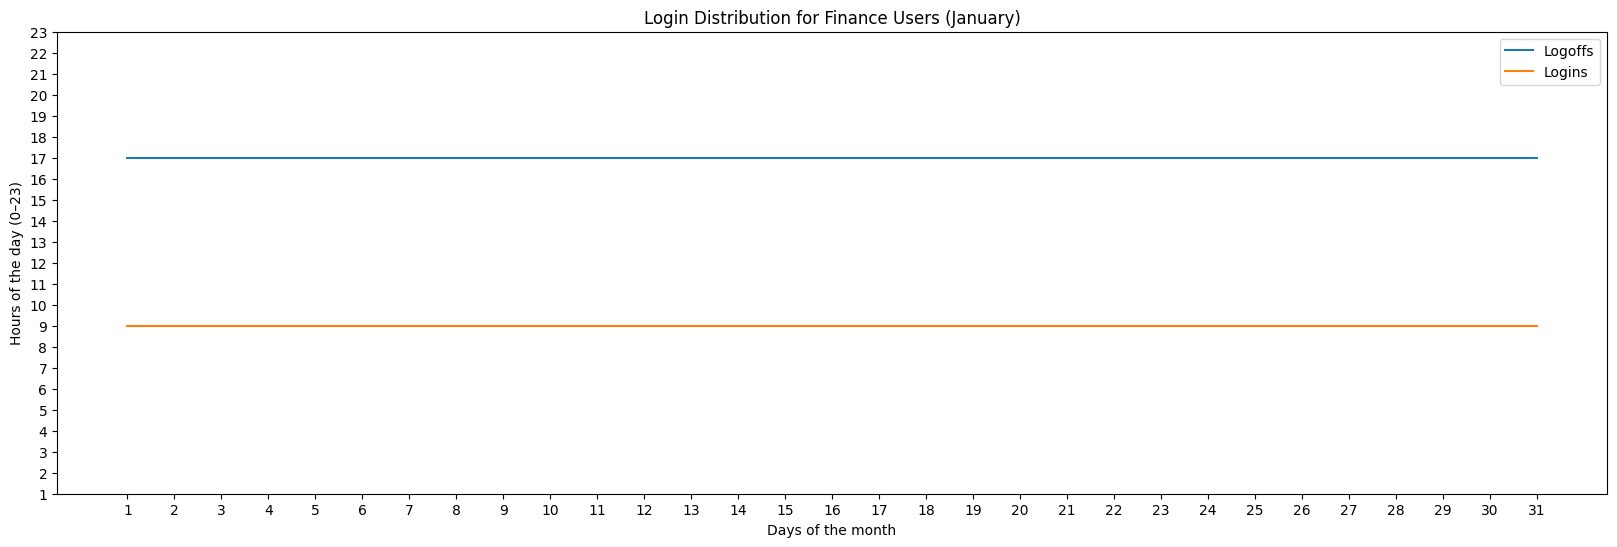

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#check the pc name in pc in login
username = login_data[login_data['pc'] == 'pc42'].copy()
#checks for the pc42 in jan and not affect original csv
january_df = username[username['datetime'].dt.month == 1].copy()


january_df['day'] = january_df['datetime'].dt.day
january_df['hour'] = january_df['datetime'].dt.hour

#counts how many users login by the hour and sorts it
login = january_df[january_df['action'] == 'login']
login_counts = login.groupby(['day', 'hour']).size().reset_index(name='count')
# print(login_counts)
#counts how many users logoff by the hour and sorts it
logoff = january_df[january_df['action'] == 'logoff']
logoff_counts = logoff.groupby(['day', 'hour']).size().reset_index()
# print(logoff_counts)


fig = plt.figure(figsize=(20, 6))
plt.plot(logoff_counts['day'], logoff_counts['hour'], label='Logoffs')
plt.plot(login_counts['day'], login_counts['hour'], label='Logins')
plt.xlabel('Days of the month')
plt.ylabel('Hours of the day (0–23)')
plt.title('Login Distribution for Finance Users (January)')
plt.xticks(range(1,32))
plt.yticks(range(1,24))
plt.legend()
plt.show()
#x axis  days of the month
#y axis hours of the day
#plot the graph

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

                        datetime                            sender  \
12786 2018-01-05 01:04:48.422740  usr-znp@technova-innovations.net   
12787 2018-01-05 01:22:35.136104  usr-num@technova-innovations.net   
12788 2018-01-05 01:42:38.334986  usr-tux@technova-innovations.net   
12789 2018-01-05 02:17:10.718871  usr-vtc@technova-innovations.net   
12790 2018-01-05 02:18:54.748752  usr-tux@technova-innovations.net   

                              recipient        date  
12786  usr-qib@technova-innovations.net  2018-01-05  
12787  usr-cab@technova-innovations.net  2018-01-05  
12788  usr-qib@technova-innovations.net  2018-01-05  
12789  usr-tux@technova-innovations.net  2018-01-05  
12790  usr-hkw@technova-innovations.net  2018-01-05  


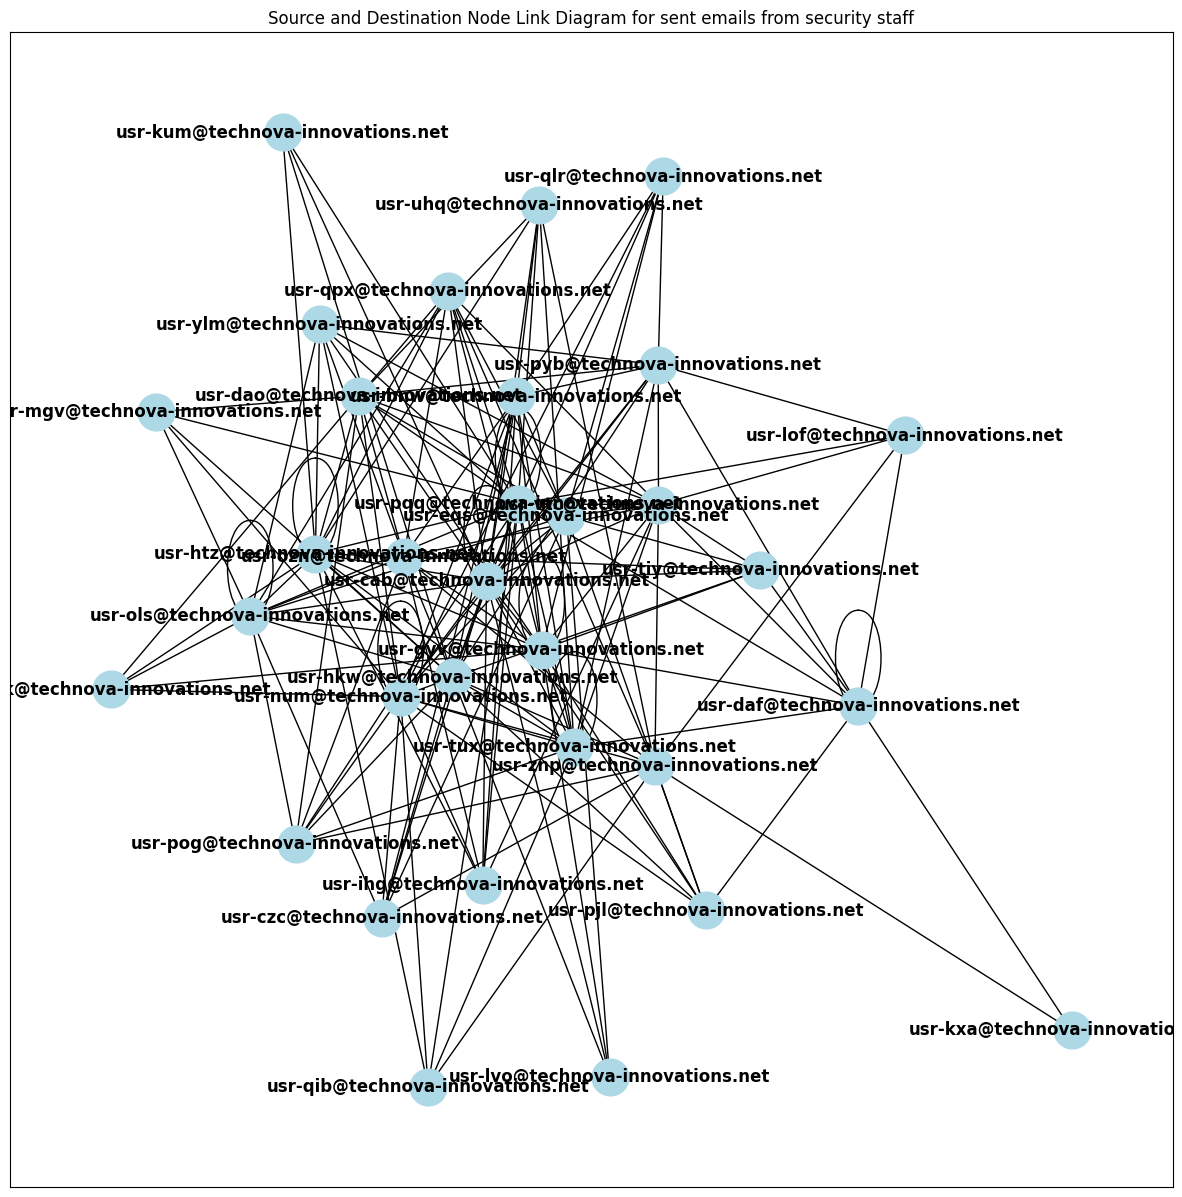

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

email_data['datetime'] = pd.to_datetime(email_data['datetime'])

security_email = employee_data[employee_data['role'] == 'Security']['email'].copy()


security_email_data = email_data[email_data['sender'].isin(security_email)].copy()

#seperate the date column so datetime does not get affected
security_email_data['date'] = security_email_data['datetime'].dt.date

#get the right date
security_22 = security_email_data[security_email_data['date'] == pd.Timestamp('2018-01-05').date()]
print(security_22.head())

G = nx.from_pandas_edgelist(security_22, source='sender', target='recipient')
pos = nx.spring_layout(G)

plt.figure(figsize=(15, 15))
nx.draw_networkx(G,pos,with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title('Source and Destination Node Link Diagram for sent emails from security staff')
plt.show()


### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

                        datetime                            sender  \
12786 2018-01-05 01:04:48.422740  usr-znp@technova-innovations.net   
12787 2018-01-05 01:22:35.136104  usr-num@technova-innovations.net   
12788 2018-01-05 01:42:38.334986  usr-tux@technova-innovations.net   
12789 2018-01-05 02:17:10.718871  usr-vtc@technova-innovations.net   
12790 2018-01-05 02:18:54.748752  usr-tux@technova-innovations.net   

                              recipient        date  
12786  usr-qib@technova-innovations.net  2018-01-05  
12787  usr-cab@technova-innovations.net  2018-01-05  
12788  usr-qib@technova-innovations.net  2018-01-05  
12789  usr-tux@technova-innovations.net  2018-01-05  
12790  usr-hkw@technova-innovations.net  2018-01-05  


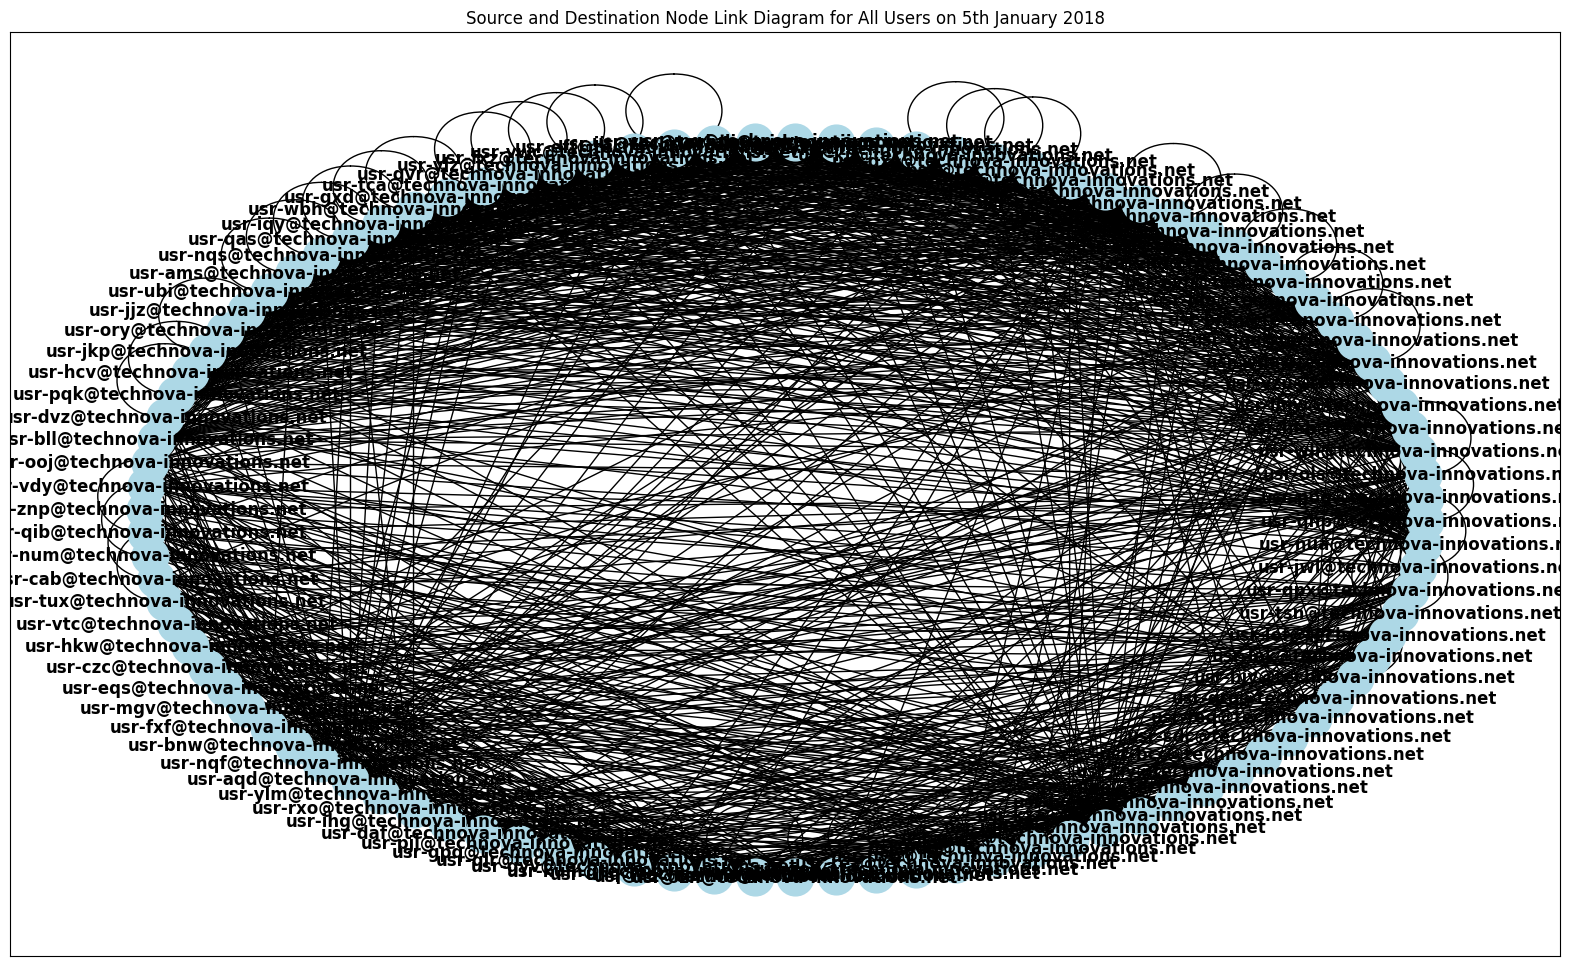

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

email_data['datetime'] = pd.to_datetime(email_data['datetime'])
all_users_email = employee_data['email'].copy()
all_user_email_data = email_data[email_data['sender'].isin(all_users_email)].copy()
all_user_email_data['date'] = all_user_email_data['datetime'].dt.date

user_email_22 = all_user_email_data[all_user_email_data['date'] == pd.Timestamp('2018-01-05').date()]
print(user_email_22.head())
G = nx.from_pandas_edgelist(user_email_22, source='sender', target='recipient')
pos = nx.shell_layout(G)

# Plot the graph
plt.figure(figsize=(20 ,12))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title('Source and Destination Node Link Diagram for All Users on 5th January 2018')
plt.show()


### Question 5: Show a comparison between the files accessed by HR staff,
Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

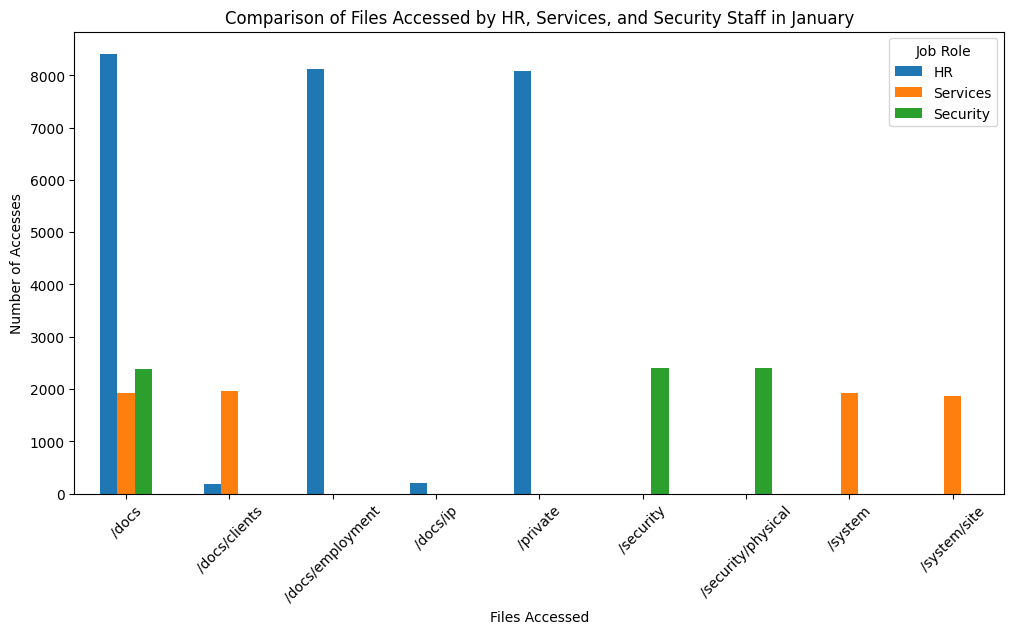

In [ ]:
######### ADD YOUR CODE HERE ##########

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for January
file_data['datetime']=pd.to_datetime(file_data['datetime'])
january_data=file_data['month'] = file_data['datetime'].dt.month
january_data = file_data[file_data['month'] == 1].copy()

#get user data based on role from employee_data csv
hr_employees = employee_data[employee_data['role'] == 'HR']['user']
services_employees = employee_data[employee_data['role'] == 'Services']['user']
security_employees = employee_data[employee_data['role'] == 'Security']['user']

#using user data get the filenames accessed in january
hr_data = january_data[january_data['user'].isin(hr_employees)]
services_data = january_data[january_data['user'].isin(services_employees)]
security_data = january_data[january_data['user'].isin(security_employees)]

# Count files accessed by each role
#check in file_data dataframe for filename
hr_files = hr_data['filename'].value_counts()
services_files = services_data['filename'].value_counts()
security_files = security_data['filename'].value_counts()

#based on the count of the roles create a new dataframe to plot it
df1= pd.DataFrame({"HR":hr_files,
                   "Services":services_files,
                   "Security":security_files}).fillna(0)


df1.plot.bar(figsize=(12, 6))
plt.title('Comparison of Files Accessed by HR, Services, and Security Staff in January')
plt.xlabel('Files Accessed')
plt.ylabel('Number of Accesses')
plt.xticks(rotation=45)
plt.legend(title='Job Role')
plt.show()


##Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

## Marks are awarded for:
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

## Login data

Looked at all the roles login and logoff times in a bar chart

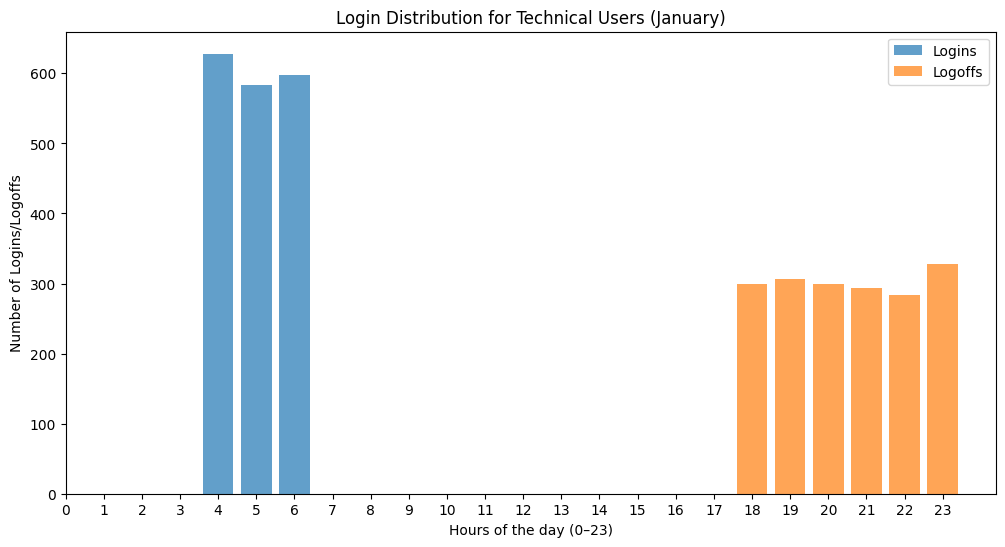

Most Login time for Technical: 4
Most Logoff time for Technical: 23


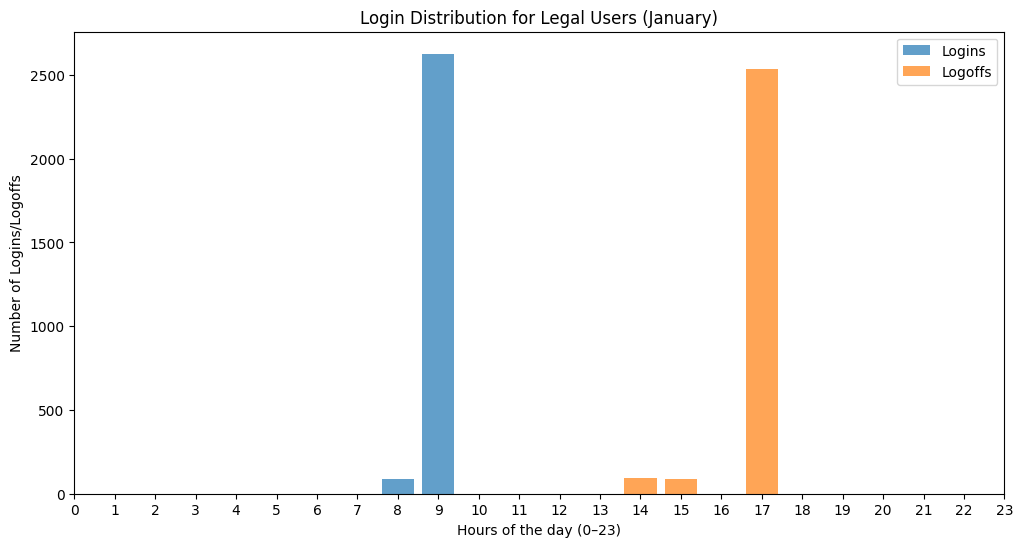

Most Login time for Legal: 9
Most Logoff time for Legal: 17


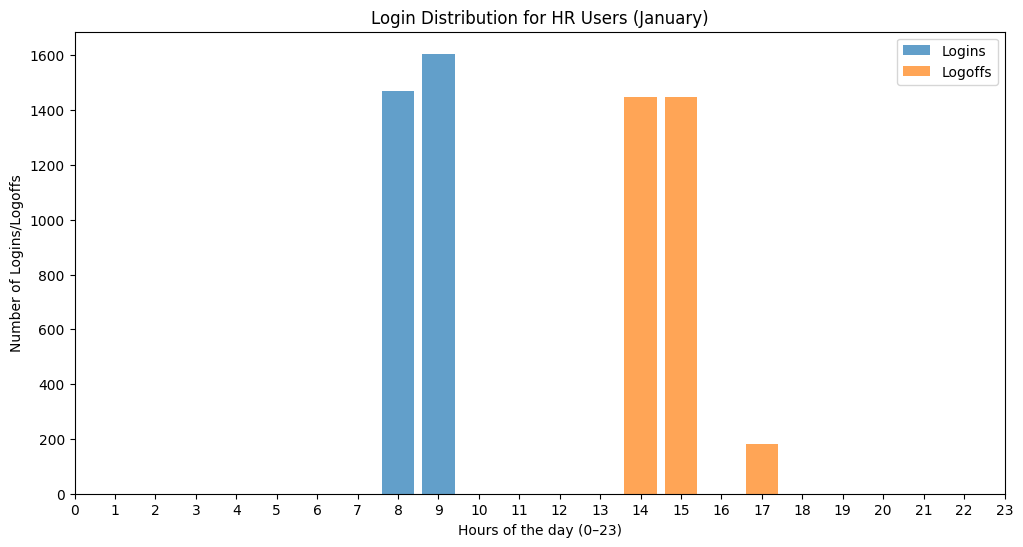

Most Login time for HR: 9
Most Logoff time for HR: 15


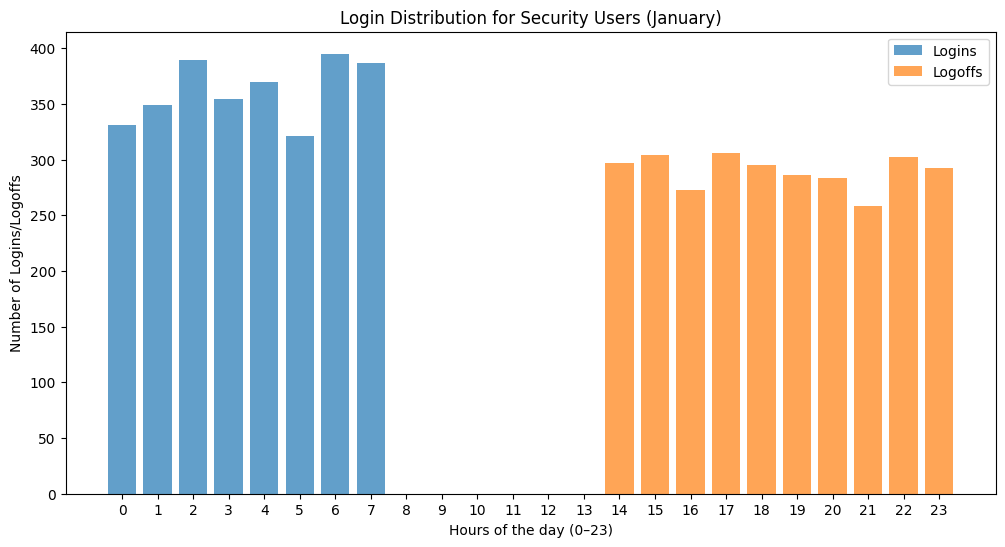

Most Login time for Security: 6
Most Logoff time for Security: 17


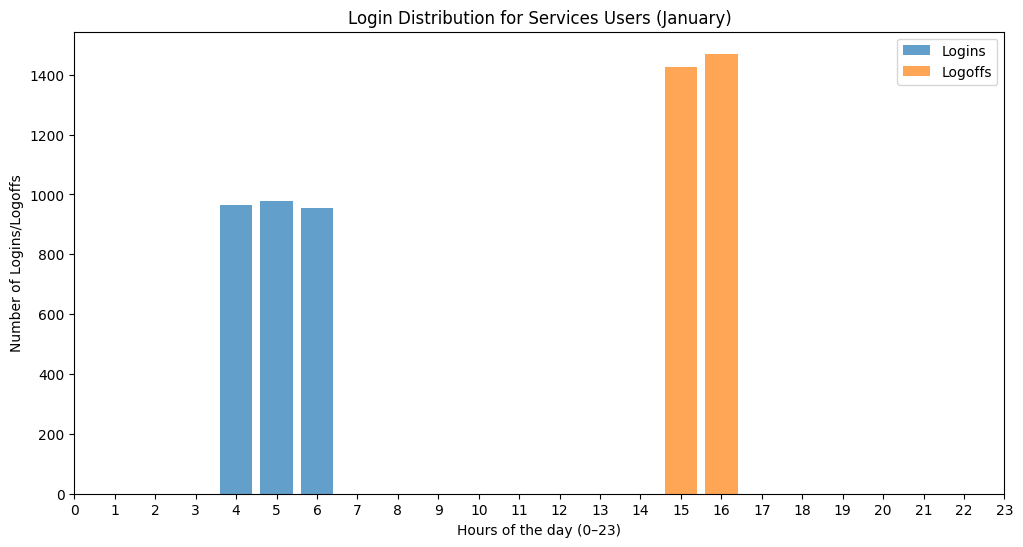

Most Login time for Services: 5
Most Logoff time for Services: 16


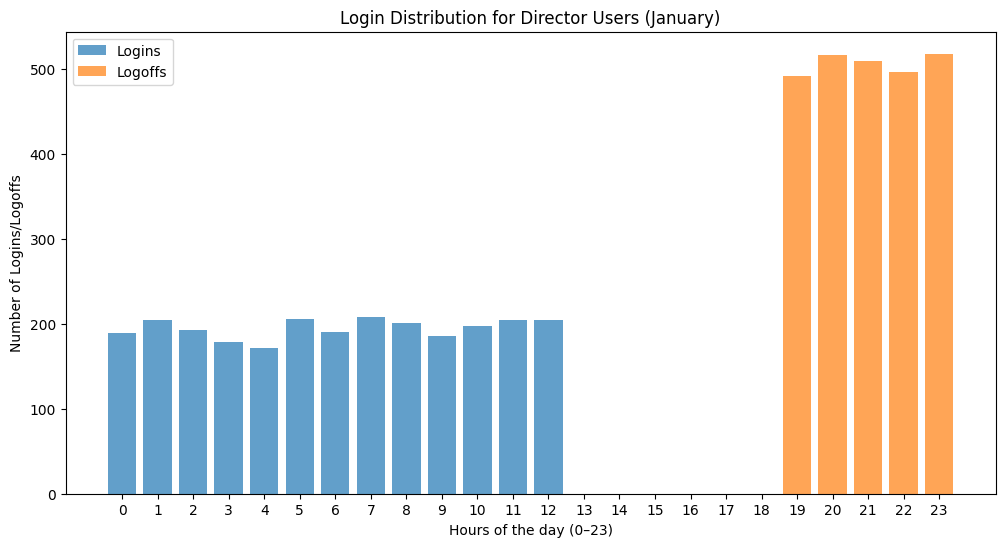

Most Login time for Director: 7
Most Logoff time for Director: 23


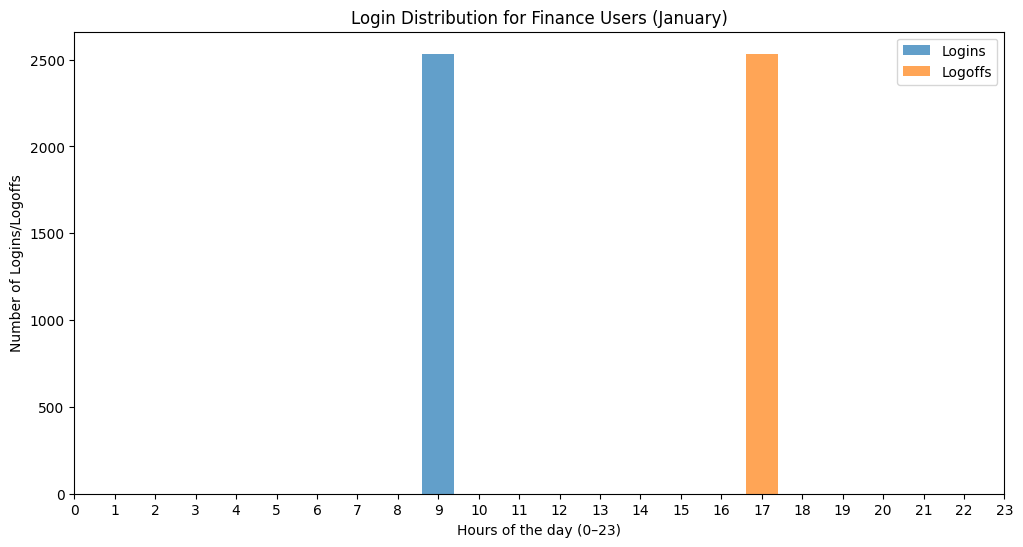

Most Login time for Finance: 9
Most Logoff time for Finance: 17


In [ ]:


    for role in all_roles:
      # Get users in the current sector
      sector_users = user_set[role]

      # Filter login data for the current sector
      sector_login_data = login_data[login_data['user'].isin(sector_users)].copy()

      sector_login_data['datetime'] =  pd.to_datetime(sector_login_data['datetime'])
      sector_login_data['hour'] = sector_login_data['datetime'].dt.hour

      # Calculate hourly login counts
      login_counts = sector_login_data[sector_login_data['action'] == 'login']['hour'].value_counts().sort_index().reset_index()
      login_counts = login_counts.set_axis(['hour', 'count'], axis=1)

      # Calculate hourly logoff counts
      logoff_counts = sector_login_data[sector_login_data['action'] == 'logoff']['hour'].value_counts().sort_index().reset_index()
      logoff_counts = logoff_counts.set_axis(['hour', 'count'], axis=1)

      fig = plt.figure(figsize=(12, 6))
      plt.bar(login_counts['hour'], login_counts['count'], label='Logins', alpha=0.7)
      plt.bar(logoff_counts['hour'], logoff_counts['count'], label='Logoffs', alpha=0.7)
      plt.xlabel('Hours of the day (0–23)')
      plt.ylabel('Number of Logins/Logoffs')
      plt.title(f'Login Distribution for {role} Users (January)')
      plt.xticks(range(24))
      plt.legend()
      plt.show()

      print(f"Most Login time for {role}:", login_counts['hour'][login_counts['count'].idxmax()])
      print(f"Most Logoff time for {role}:", logoff_counts['hour'][logoff_counts['count'].idxmax()])


Looking at the login_data, HR and legal users have some hours of low login and logoff counts,this is explored further in heatmaps of those roles.

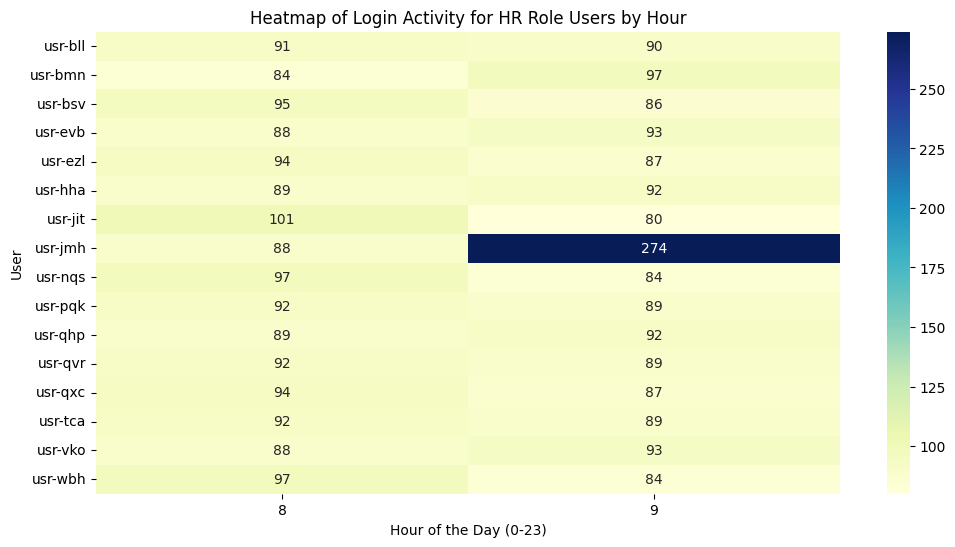

datetime     user  action    pc  hour
148   2018-01-01 17:31:17  usr-jmh  logoff  pc96    17
347   2018-01-02 17:19:48  usr-jmh  logoff  pc96    17
552   2018-01-03 17:26:52  usr-jmh  logoff  pc96    17
740   2018-01-04 17:05:13  usr-jmh  logoff  pc96    17
957   2018-01-05 17:40:22  usr-jmh  logoff  pc96    17
...                   ...      ...     ...   ...   ...
35346 2018-06-26 17:30:20  usr-jmh  logoff  pc96    17
35555 2018-06-27 17:29:57  usr-jmh  logoff  pc96    17
35749 2018-06-28 17:23:27  usr-jmh  logoff  pc96    17
35939 2018-06-29 17:04:32  usr-jmh  logoff  pc96    17
36151 2018-06-30 17:22:21  usr-jmh  logoff  pc96    17

[181 rows x 5 columns]

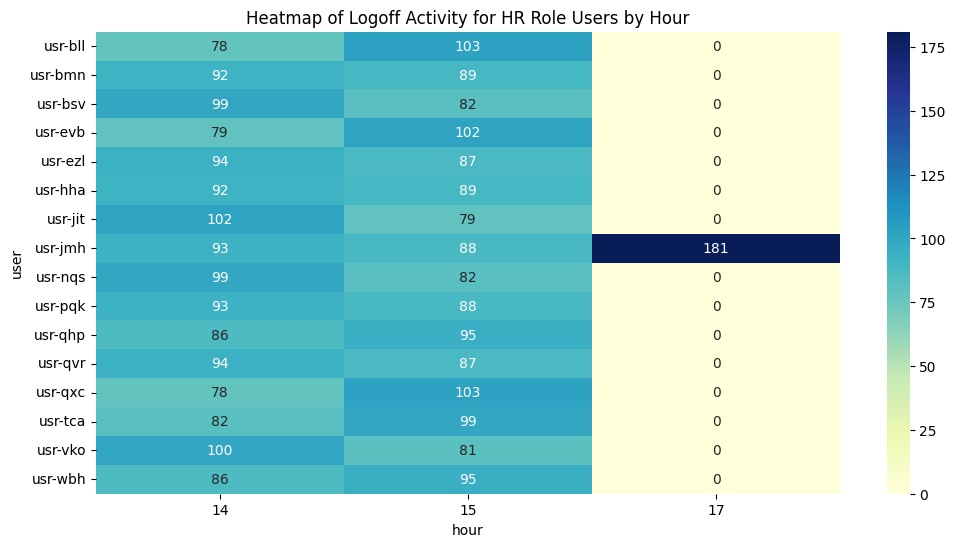

In [ ]:
import seaborn as sns
# Filter hr_login_data for only login actions
hr_employees = employee_data[employee_data['role'] == 'HR']['user']
hr_login_data=login_data[login_data['user'].isin(hr_employees)]

hr_login_data_filtered = hr_login_data[hr_login_data['action'] == 'login'].copy()
hr_logoff_data=hr_login_data[hr_login_data['action'] == 'logoff'].copy()
hr_login_data_filtered['hour']=hr_login_data_filtered['datetime'].dt.hour
hr_logoff_data['hour']=hr_logoff_data['datetime'].dt.hour

heatmap_data = hr_login_data_filtered.pivot_table(index='user',columns='hour',values='action',aggfunc='count',fill_value=0)
heatmap_data1=hr_logoff_data.pivot_table(index='user',columns='hour',values='action',aggfunc='count',fill_value=0)

# Plot the heatmap for login
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Login Activity for HR Role Users by Hour')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('User')
plt.show()

#plot heatmap for logoff
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data1, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Logoff Activity for HR Role Users by Hour')

usr_jmh_9am_login = hr_logoff_data[
    (hr_logoff_data['user'] == 'usr-jmh') & (hr_logoff_data['hour'] == 17)
]




usr_jmh_9am_login

# usr-jmh activity times for 9am and 5pm the login times



Looked into HR users,Usr-jmh logins in very frequently at 9am compared to the other users.Also, its the only one that logins at 5pm out of all the HR users.

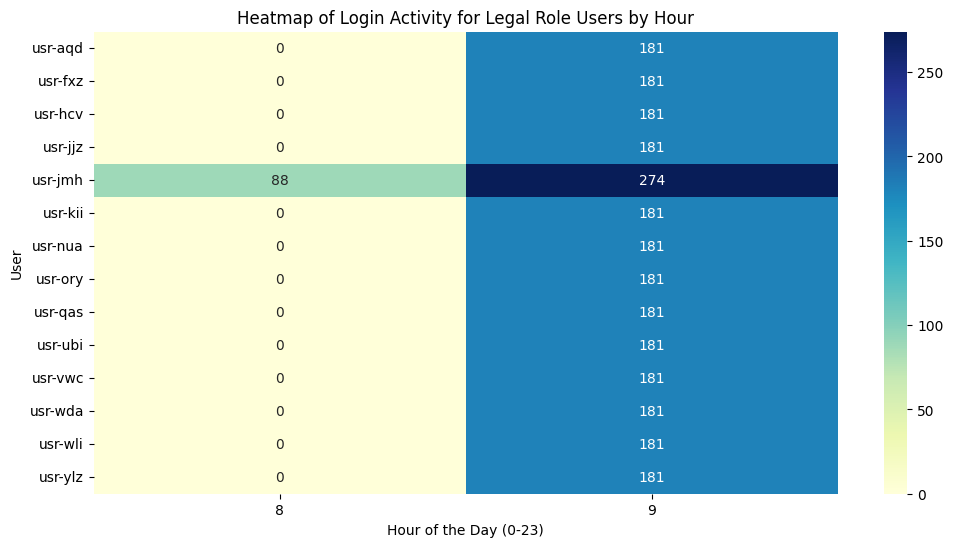

Text(0.5, 1.0, 'Heatmap of Logoff Activity for Legal Role Users by Hour')

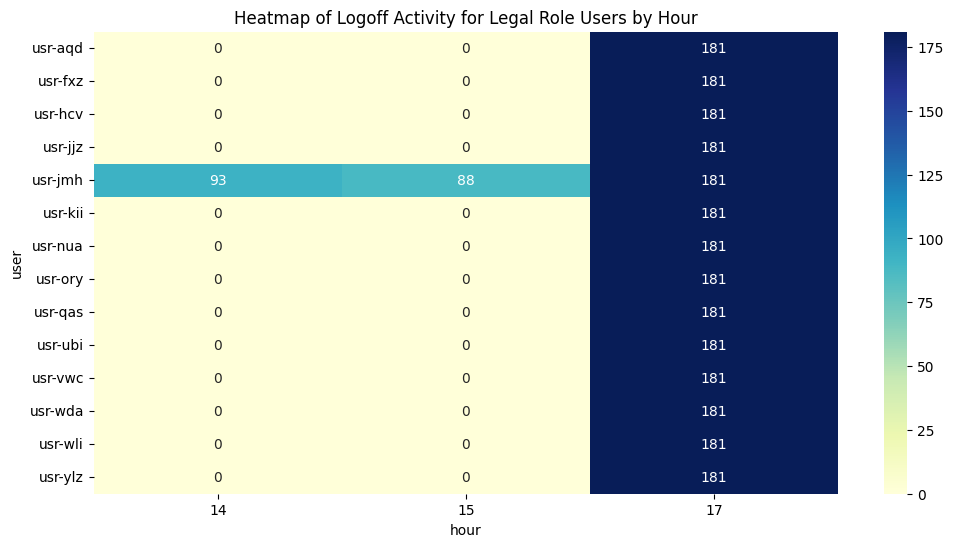

In [ ]:
import seaborn as sns
# Filter legal employees for only login actions
legal_employees = employee_data[employee_data['role'] == 'Legal']['user']
legal_login_data=login_data[login_data['user'].isin(legal_employees)]

legal_login_data_filtered = legal_login_data[legal_login_data['action'] == 'login'].copy()
legal_login_data_filtered['hour'] = legal_login_data_filtered['datetime'].dt.hour

legal_logoff_data = legal_login_data[legal_login_data['action'] == 'logoff'].copy()
legal_logoff_data['hour'] = legal_logoff_data['datetime'].dt.hour

heatmap_data = legal_login_data_filtered.pivot_table(index='user',columns='hour',values='action',aggfunc='count',fill_value=0)
heatmap_data1=legal_logoff_data.pivot_table(index='user',columns='hour',values='action',aggfunc='count',fill_value=0)

# Plot the heatmap for login
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Login Activity for Legal Role Users by Hour')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('User')
plt.show()

#plot heatmap for logoff
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data1, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Logoff Activity for Legal Role Users by Hour')




Based on the heatmaps for Legal role login data, usr-jmh is the only user to logout at 2pm and 3pm at a high frequency .For login it is the only user to login at 8am and has a different count compared to the other users at 9am.

## File_data

 ### Displayed login and logoff times for each role to use as working hours for each role from the bar charts when investigating file access. Looked at HR ,legal and finance users as they have similar times in a line graph

   hour  count
0     8   5571
1     9  17660
2    10  24682
3    11  24846
4    12  24739
5    13  24712
6    14  17962
7    15   6091
8    16    419
9    17    245


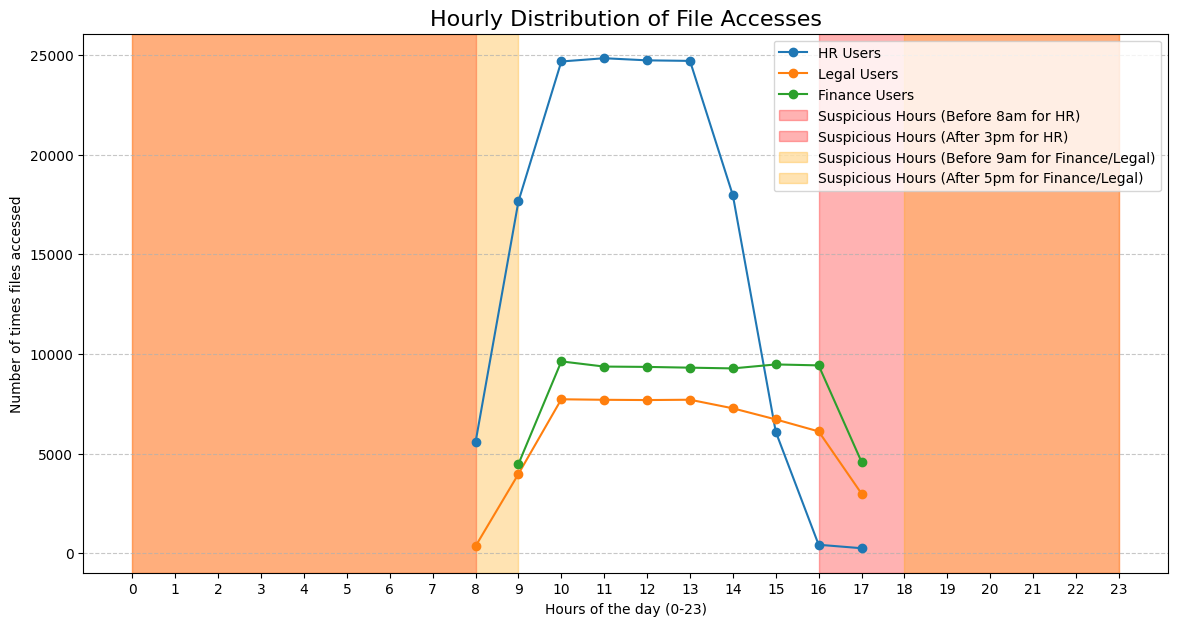

In [ ]:
######### ADD YOUR CODE HERE ##########
file_data['datetime']=pd.to_datetime(file_data['datetime'])
file_data['hour']=file_data['datetime'].dt.hour.copy()

hr_employees = employee_data[employee_data['role'] == 'HR']['user']
Legal_employees=employee_data[employee_data['role'] == 'Legal']['user']
Finance_employees=employee_data[employee_data['role'] == 'Finance']['user']


legal_files = file_data[file_data['user'].isin(Legal_employees)]['hour'].value_counts().sort_index().reset_index()
finance_files = file_data[file_data['user'].isin(Finance_employees)]['hour'].value_counts().sort_index().reset_index()
hr_files = file_data[file_data['user'].isin(hr_employees)]['hour'].value_counts().sort_index().reset_index()


print(hr_files)

#plot the multi line graph
plt.figure(figsize=(14, 7))
plt.plot(hr_files['hour'], hr_files['count'], marker='o', label='HR Users')
plt.plot(legal_files['hour'], legal_files['count'], marker='o', label='Legal Users')
plt.plot(finance_files['hour'], finance_files['count'], marker='o', label='Finance Users')
plt.title('Hourly Distribution of File Accesses', fontsize=16)
plt.xlabel('Hours of the day (0-23)')
plt.ylabel('Number of times files accessed')
plt.xticks(range(24))

#boundries added
plt.axvspan(0, 8, color="red", alpha=0.3, label="Suspicious Hours (Before 8am for HR)")
plt.axvspan(16, 23, color="red", alpha=0.3, label="Suspicious Hours (After 3pm for HR)")
plt.axvspan(0, 9, color="orange", alpha=0.3, label="Suspicious Hours (Before 9am for Finance/Legal)")
plt.axvspan(18, 23, color="orange", alpha=0.3, label="Suspicious Hours (After 5pm for Finance/Legal)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()





Legal users and HR users are accessing outside their usual hours.Potential user that might suspicious.




### Created a stacked bar chart from the hours found from the login_data role bar charts

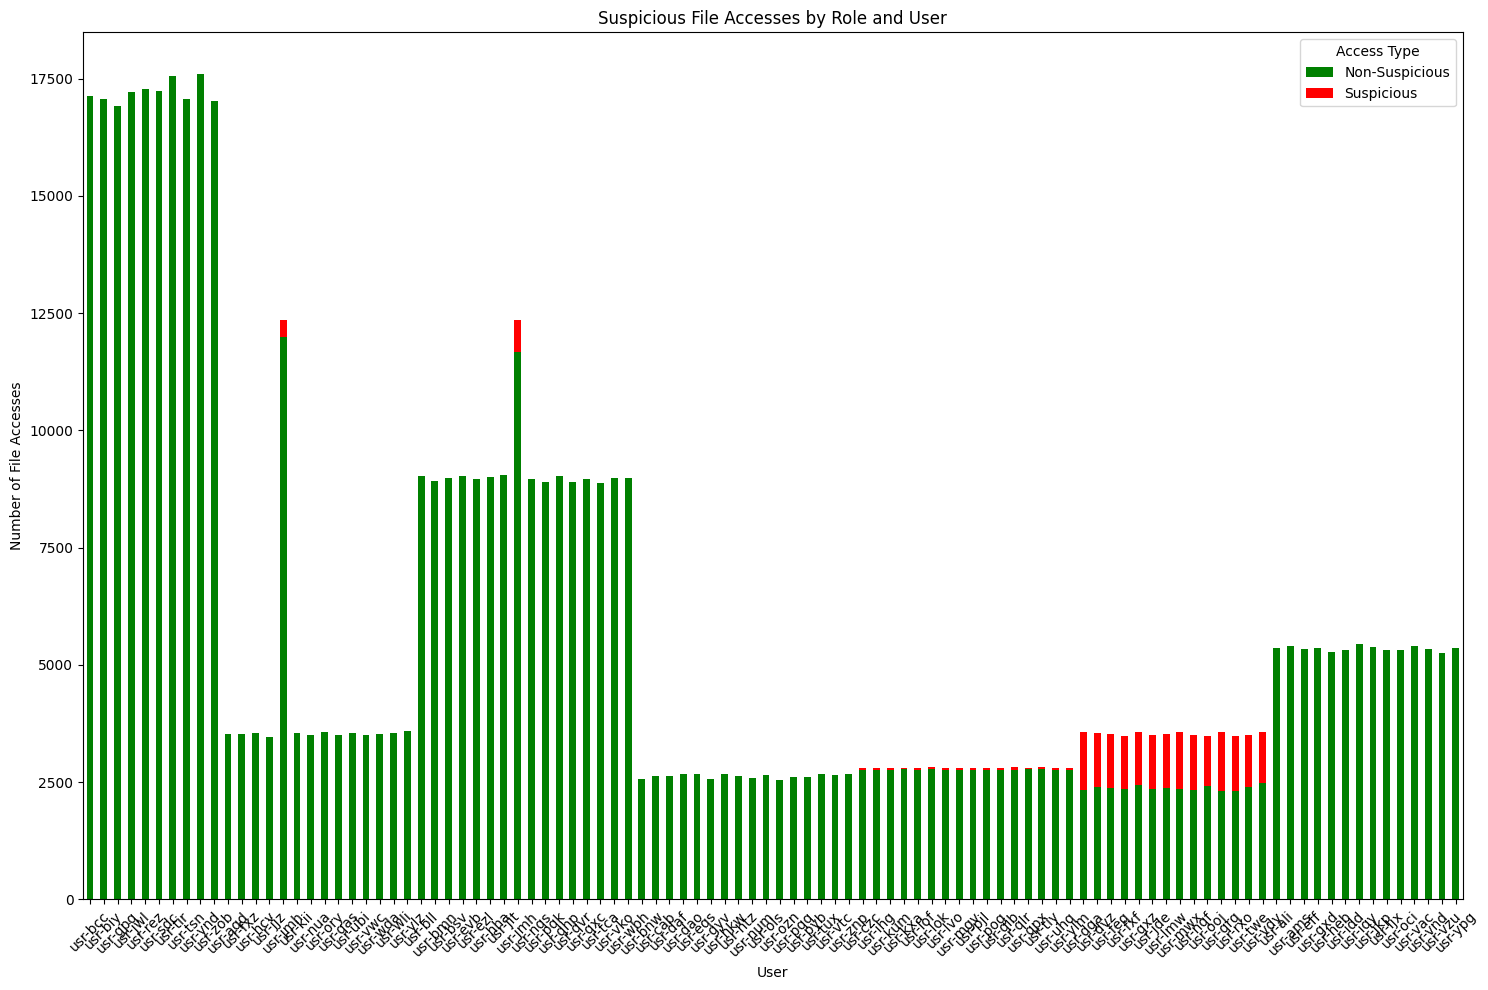

         Non-Suspicious  Suspicious      Role
user                                         
usr-qrq            2301      1257.0  Director
usr-dga            2321      1247.0  Director
usr-mwx            2345      1222.0  Director
usr-nqf            2338      1175.0  Director
usr-rxo            2310      1172.0  Director
usr-lmw            2368      1163.0  Director
usr-jde            2351      1155.0  Director
usr-dvz            2389      1150.0  Director
usr-feq            2379      1142.0  Director
usr-gxz            2428      1138.0  Director
usr-fxf            2342      1131.0  Director
usr-twe            2399      1106.0  Director
usr-vdy            2476      1100.0  Director
usr-ooj            2424      1056.0  Director
usr-jmh           11680       664.0        HR
usr-jmh           11995       349.0     Legal
usr-qlr            2758        57.0  Services
usr-ylm            2748        53.0  Services
usr-qib            2756        52.0  Services
usr-ihg            2752        51.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_data['datetime'] = pd.to_datetime(file_data['datetime'])
file_data['hour'] = file_data['datetime'].dt.hour

# Based on the login data, identified the hours users should be working
non_suspicious_hours = {
    'Technical': (4, 23),
    'Legal': (9, 17),
    'HR': (8, 15),
    'Security': (0, 23),
    'Services': (5, 16),
    'Director': (12, 23),
    'Finance': (9, 17)
}

all_roles_access = pd.DataFrame()

#loop through it
for role in non_suspicious_hours:
    start_hour, end_hour = non_suspicious_hours[role]
    # Filter file data based on their roles
    role_employees = employee_data[employee_data['role'] == role]['user']
    role_data = file_data[file_data['user'].isin(role_employees)].copy()

    # Find suspicious and non-suspicious activity
    role_data['Suspicious'] = (role_data['hour'] < start_hour) | (role_data['hour'] > end_hour)
    role_data['Non-Suspicious'] = ~role_data['Suspicious']

    # Count accesses
    suspicious_file_access = role_data[role_data['Suspicious']]['user'].value_counts()
    non_sus_file_access = role_data[role_data['Non-Suspicious']]['user'].value_counts()

    #merge into a single dataframe
    role_access = pd.DataFrame({
        'Non-Suspicious': non_sus_file_access,
        'Suspicious': suspicious_file_access
    }).fillna(0)
    role_access['Role'] = role
    all_roles_access = pd.concat([all_roles_access, role_access])


#plot as stacked bar chart
all_roles_access[['Non-Suspicious', 'Suspicious']].plot( kind='bar',stacked=True,color=['green', 'red'],figsize=(15,10))
plt.title('Suspicious File Accesses by Role and User')
plt.xlabel('User')
plt.ylabel('Number of File Accesses')
plt.xticks(rotation=45)
plt.legend(title='Access Type')
plt.tight_layout()
plt.show()

#show the users that suspicious activity
top_two_users = all_roles_access.sort_values(by='Suspicious', ascending=False).head(32)

print(top_two_users)




Based on the roles, look further into director,HR,Legal and Services sector to see any anomlamous activities for specific users.

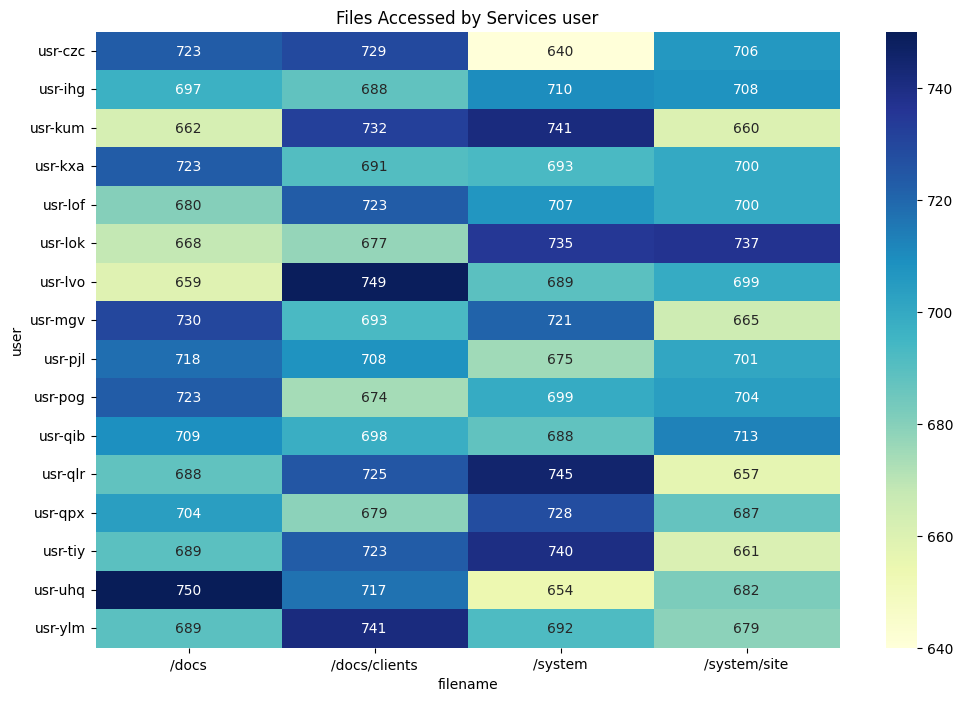

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#looking at all the dates

# Convert 'datetime' to a proper datetime object and extract hour for suspicious access flag
file_data['datetime'] = pd.to_datetime(file_data['datetime'])
file_data['hour'] = file_data['datetime'].dt.hour
file_data['Suspicious'] = file_data['hour']
service_employees = employee_data[employee_data['role'] == 'Services']['user']


# Filter for Service users and all the files accessed for each
Services_suspicious_access = file_data[(file_data['user'].isin(service_employees))]
files_accessed_by_services = Services_suspicious_access.groupby(['user', 'filename']).size().reset_index(name='count')

#plot heatmap
plt.figure(figsize=(12, 8))
plt.title('Files Accessed by Services user')
plt.xlabel("Filename")
plt.ylabel("Legal User")
files_matrix_service = files_accessed_by_services.pivot_table(index="user", columns='filename', values="count", fill_value=0)
sns.heatmap(files_matrix_service, cmap="YlGnBu", annot=True, fmt="0.0f")
plt.show()

Nothing suspicious in the file access count in any of the users in service.

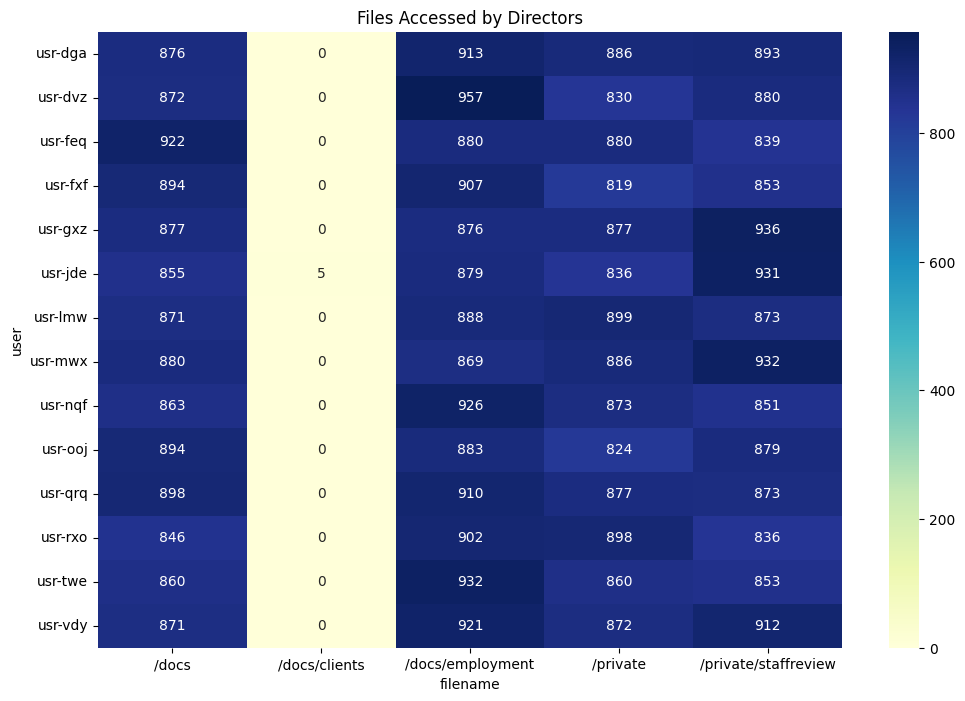

                         datetime     user       filename  month  hour  \
313237 2018-04-09 11:15:03.434655  usr-jde  /docs/clients      4    11   
314429 2018-04-09 14:34:34.729796  usr-jde  /docs/clients      4    14   
314750 2018-04-09 15:52:10.833807  usr-jde  /docs/clients      4    15   
315123 2018-04-09 18:23:48.810721  usr-jde  /docs/clients      4    18   
315226 2018-04-09 20:24:05.566406  usr-jde  /docs/clients      4    20   

        Suspicious  
313237          11  
314429          14  
314750          15  
315123          18  
315226          20  


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#looking at all the dates

file_data['datetime'] = pd.to_datetime(file_data['datetime'])
file_data['hour'] = file_data['datetime'].dt.hour
file_data['Suspicious'] = file_data['hour']
director_employees = employee_data[employee_data['role'] == 'Director']['user']

# Filter for Director users and all the files accessed for each

director_suspicious_access = file_data[(file_data['user'].isin(director_employees))]
files_accessed_by_director = director_suspicious_access.groupby(['user', 'filename']).size().reset_index(name='count')

#plot heatmap
plt.figure(figsize=(12, 8))
plt.title('Files Accessed by Directors')
plt.xlabel("Filename")
plt.ylabel("Director User")
files_matrix_director = files_accessed_by_director.pivot_table(index="user", columns='filename', values="count", fill_value=0)
sns.heatmap(files_matrix_director, cmap="YlGnBu", annot=True, fmt="0.0f")
plt.show()

#display suspect data found filtered it
filtered_data = file_data[(file_data['user'] == 'usr-jde') & (file_data['filename'] == '/docs/clients')]
print(filtered_data)







Usr-jde is the only director to have accessed /docs/clients during normal hours and none of the other directors accessed it even though other departments use this file . Accessed it all in one day on 9th April.

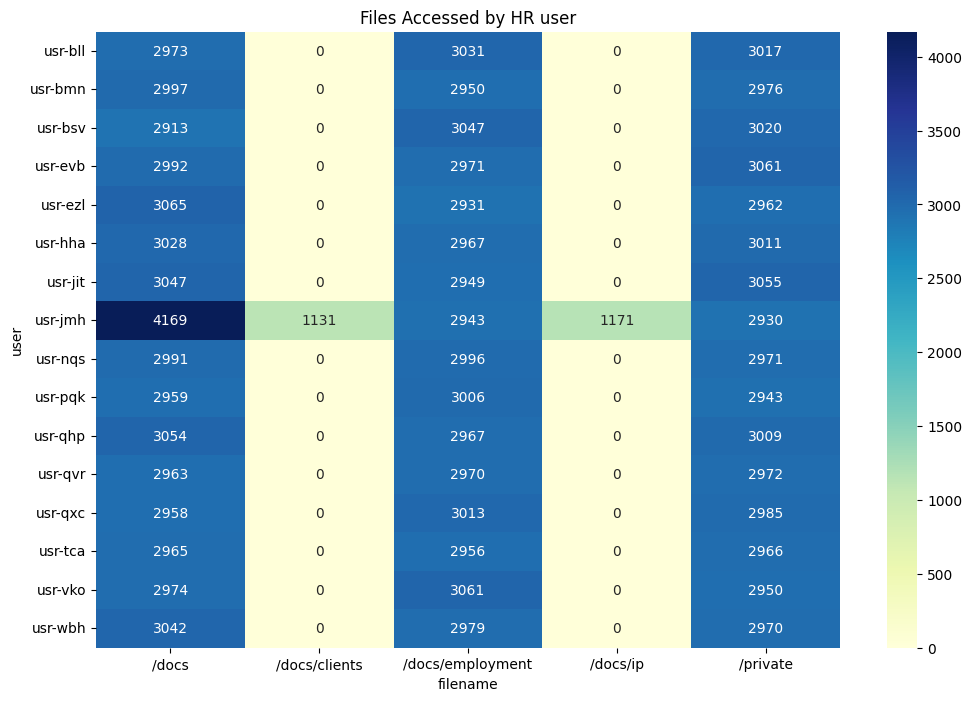

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#looking at all the dates

# Convert 'datetime' to a proper datetime object and extract hour for suspicious access flag
file_data['datetime'] = pd.to_datetime(file_data['datetime'])
file_data['hour'] = file_data['datetime'].dt.hour
file_data['Suspicious'] = file_data['hour']
hr_employees = employee_data[employee_data['role'] == 'HR']['user']

# Filter for Hr users and all the files accessed for each
HR_suspicious_access = file_data[(file_data['user'].isin(hr_employees))]
files_accessed_by_HR = HR_suspicious_access.groupby(['user', 'filename']).size().reset_index(name='count')

#display heatmap
plt.figure(figsize=(12, 8))
plt.title('Files Accessed by HR user')
plt.xlabel("Filename")
plt.ylabel("Legal User")
files_matrix_HR = files_accessed_by_HR.pivot_table(index="user", columns='filename', values="count", fill_value=0)
sns.heatmap(files_matrix_HR, cmap="YlGnBu", annot=True, fmt="0.0f")
plt.show()


Usr-jmh is the only one who accessed /docs/clients and /doc/ip with high numbers./docs was also accessed like the others but very high though.

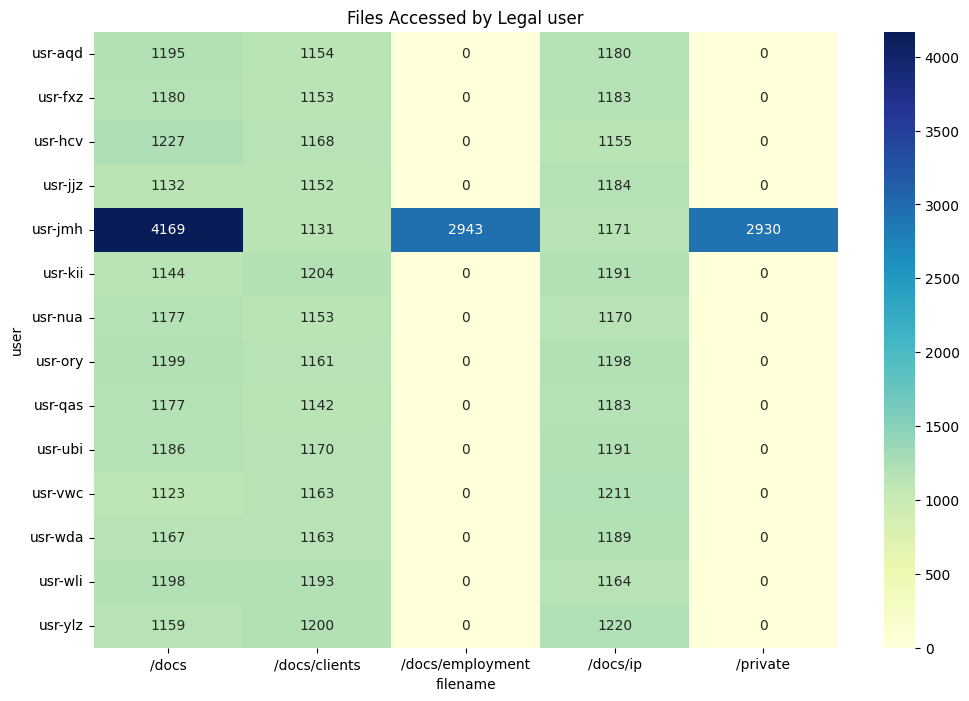

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#looking at all the dates

# Convert 'datetime' to a proper datetime object and extract hour for suspicious access flag
file_data['datetime'] = pd.to_datetime(file_data['datetime'])
file_data['hour'] = file_data['datetime'].dt.hour
file_data['Suspicious'] = file_data['hour']
legal_employees = employee_data[employee_data['role'] == 'Legal']['user']

# Filter for Legal users and suspicious accesses
legal_suspicious_access = file_data[(file_data['user'].isin(legal_employees))]
files_accessed_by_legal = legal_suspicious_access.groupby(['user', 'filename']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
plt.title('Files Accessed by Legal user')
plt.xlabel("Filename")
plt.ylabel("Legal User")
files_matrix_legal = files_accessed_by_legal.pivot_table(index="user", columns='filename', values="count", fill_value=0)
sns.heatmap(files_matrix_legal, cmap="YlGnBu", annot=True, fmt="0.0f")
plt.show()


usr-jmh again is suspicious here with its access in three files being very high and two of the files being accessed only by them.Also,it seems they are both in HR and legal user does not make sense.


## Employee Data


Check for duplicate usernames as a user comes up twice in different heatmaps.

Duplicate usernames found:
       user   role                             email    pc
89  usr-jmh     HR  usr-jmh@technova-innovations.net  pc89
96  usr-jmh  Legal  usr-jmh@technova-innovations.net  pc96


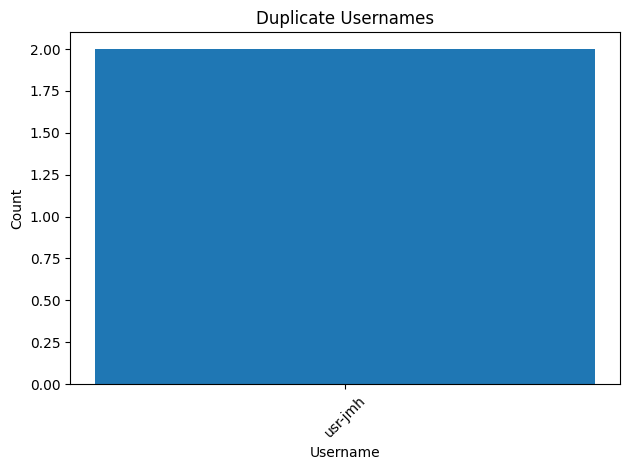

In [ ]:
# Check for duplicate usernames
duplicate_users = employee_data[employee_data.duplicated(subset=['user'], keep=False)]
duplicate_counts = duplicate_users['user'].value_counts().sort_index().reset_index(name='count')

if not duplicate_users.empty:
    print("Duplicate usernames found:")
    print(duplicate_users)

    plt.title('Duplicate Usernames')
    plt.bar(duplicate_counts['user'],duplicate_counts['count'])
    plt.xlabel('Username')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No duplicate usernames found.")


Usr-jmh is a suspect as it has duplicated usernames and has suspicious file accesses.

##USB_DATA

### Created a stacked bar chart of USB insertions and removals

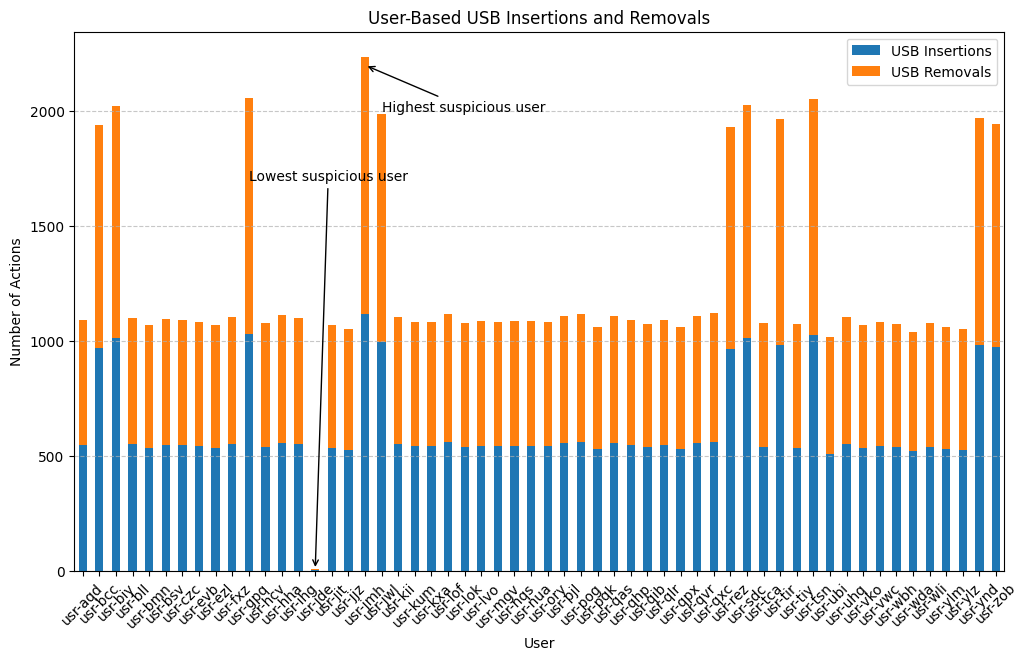

These are the users with the highest USB Insertions and removals:


USB Insertions  USB Removals
user                                 
usr-jmh            1117          1117
usr-gpq            1029          1029
usr-tsn            1027          1027
usr-sdc            1014          1014
usr-biy            1011          1011
usr-jwl             994           994
usr-ynd             984           984
usr-tir             983           983
usr-zob             973           973
usr-bcc             969           969

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])

user_usb_activity = usb_data.groupby(['user', 'action']).size().unstack(fill_value=0)
usb_insert_count = usb_data[usb_data['action'] == 'usb_insert']['user'].value_counts().copy()
usb_remove_count = usb_data[usb_data['action'] == 'usb_remove']['user'].value_counts().copy()
usb_insert_count.columns = ['user', 'usb_insert']
usb_remove_count.columns = ['user', 'usb_remove']

user_usb_activity = pd.DataFrame({
    'USB Insertions': usb_insert_count,
    'USB Removals': usb_remove_count
})
user_usb_activity
top_users = user_usb_activity.sort_values(by=["USB Insertions","USB Removals"],ascending=False).head(10)
lowest_user=user_usb_activity.sort_values(by=["USB Insertions","USB Removals"]).head(1)
user_usb_activity.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("User-Based USB Insertions and Removals")
plt.xlabel("User")
plt.ylabel("Number of Actions")
plt.annotate('Lowest suspicious user', xy=(14,4),xytext=(10,1700) ,arrowprops=dict(arrowstyle="->"))
plt.annotate('Highest suspicious user', xy=(17,2200),xytext=(18,2000), arrowprops=dict(arrowstyle="->"))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("These are the users with the highest USB Insertions and removals:")
top_users


In [ ]:
print("User with lowest USB Insertion and USB Removals:")
lowest_user


User with lowest USB Insertion and USB Removals:


USB Insertions  USB Removals
user                                 
usr-jde               4             4

Usr-jde had the lowest USB-activity by far compared to other users.

Usr-jmh had the highest USB-activity by far compared to others users.

                        datetime      action
39147 2018-04-12 09:56:19.198220  usb_insert
39153 2018-04-12 10:08:51.379665  usb_remove
39424 2018-04-12 18:04:48.983122  usb_insert
39427 2018-04-12 18:29:30.576793  usb_remove
40010 2018-04-14 12:18:04.903463  usb_insert
40025 2018-04-14 12:30:20.759272  usb_remove
40026 2018-04-14 12:32:48.528590  usb_insert
40057 2018-04-14 13:09:23.282125  usb_remove
       user      role                             email    pc
98  usr-jde  Director  usr-jde@technova-innovations.net  pc98


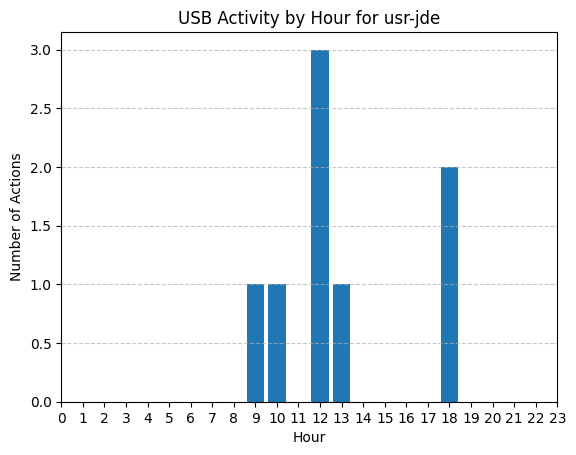

   hour  count
0     9      1
1    10      1
2    12      3
3    13      1
4    18      2


In [ ]:
# Assuming usb_data has a datetime column for timestamps
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
usb_data['hour'] = usb_data['datetime'].dt.hour

# Filter for usr-jde
jde_activity = usb_data[usb_data['user'] == 'usr-jde']
print(jde_activity[['datetime', 'action']])

#get role of usr-jde
jde_role = employee_data[employee_data['user'] == 'usr-jde']
print(jde_role)

jde_activity = jde_activity['hour'].value_counts().sort_index().reset_index(name='count')

# Plot activity by hour
plt.bar(jde_activity['hour'],jde_activity['count'])
plt.title('USB Activity by Hour for usr-jde')
plt.xlabel('Hour')
plt.ylabel('Number of Actions')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(jde_activity)



Usr-jde exhibited USB activity over two days, with short time gaps between
insertions and removals.On April 14, a USB was removed and reinserted within 2 minutes, suggesting anamalous activity.Majority of the USB activity happens at 12:00 aswell . Other users have their USB activity distributed over multiple days.

### Created a scatter plot to show the unique PC count derived from the USB data, highlighting users with multiple PCs .

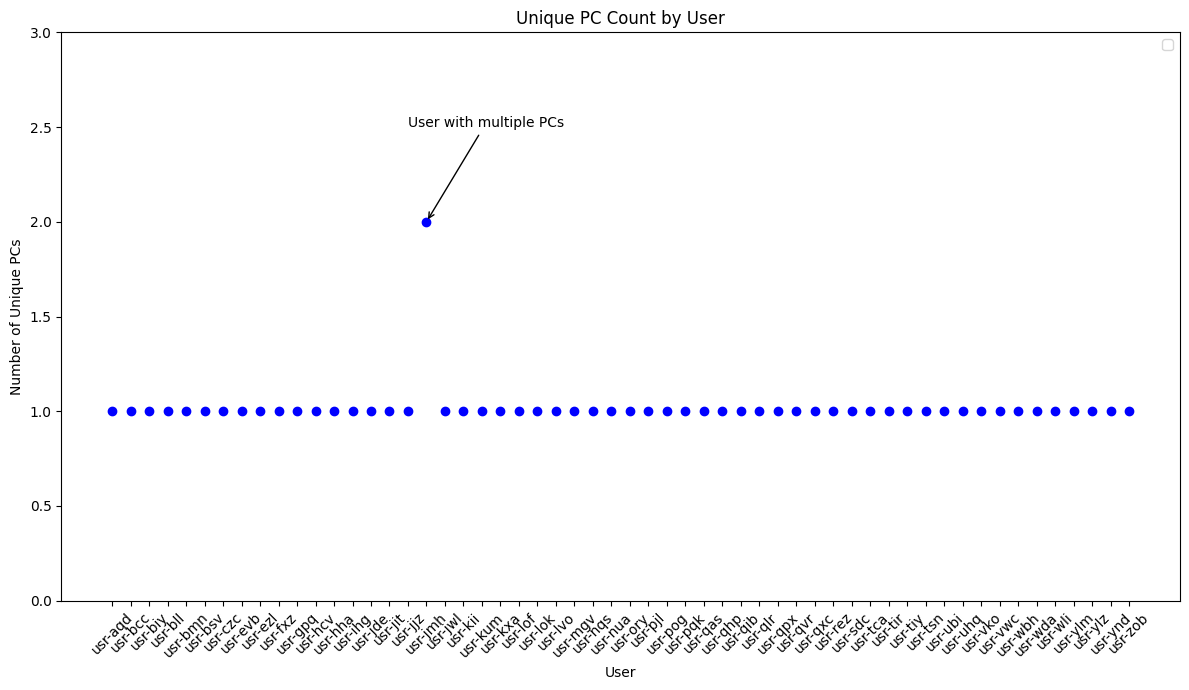

In [ ]:
usb_pc_usage = usb_data.groupby('user')['pc'].nunique().reset_index()
usb_pc_usage.columns = ['user', 'unique_pc_count']

plt.figure(figsize=(12, 7))
#start 0 and end at 3
plt.scatter(usb_pc_usage['user'], usb_pc_usage['unique_pc_count'], color='blue')
plt.title('Unique PC Count by User')
plt.xlabel('User')
plt.ylabel('Number of Unique PCs')
plt.xticks(rotation=45)
plt.ylim(0, 3)
plt.annotate('User with multiple PCs',xy=(17,2),xytext=(16,2.5),arrowprops=dict(arrowstyle="->"))
plt.legend()
plt.tight_layout()
plt.show()


Usr-jmh has been inserting and removing USB into more than one PC compared to other users.

       user   role                             email    pc
89  usr-jmh     HR  usr-jmh@technova-innovations.net  pc89
96  usr-jmh  Legal  usr-jmh@technova-innovations.net  pc96
    hour  count
0      8     25
1      9    129
2     10    297
3     11    316
4     12    344
5     13    330
6     14    311
7     15    218
8     16    155
9     17     95
10    18     14


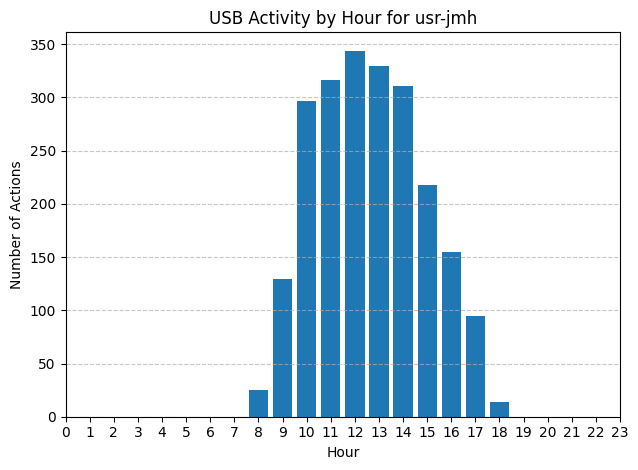

In [ ]:
# Assuming usb_data has a datetime column for timestamps
usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
usb_data['hour'] = usb_data['datetime'].dt.hour

# Filter for usr-jde
jmh_activity = usb_data[usb_data['user'] == 'usr-jmh']

#get role of usr-jde
jmh_role = employee_data[employee_data['user'] == 'usr-jmh']
print(jmh_role)

jmh_activity = jmh_activity['hour'].value_counts().sort_index().reset_index(name='count')
print(jmh_activity)
# Plot activity by hour
plt.bar(jmh_activity['hour'],jmh_activity['count'])
plt.title('USB Activity by Hour for usr-jmh')
plt.xlabel('Hour')
plt.ylabel('Number of Actions')
plt.tight_layout()
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



usr-jmh frequently switched between PCs (pc89 and pc96) during their USB activity, which is very different from other users as each user only uses one pc.

## Web Data

In [ ]:
web_data.head()

datetime     user                         website
0 2018-01-01 00:58:00.199971  usr-eqs    http://www.localsecurity.net
1 2018-01-01 04:01:07.182023  usr-nqf              http://www.sky.com
2 2018-01-01 04:20:59.495534  usr-ihg          http://www.twitter.com
3 2018-01-01 04:29:12.671361  usr-gpq           http://www.google.com
4 2018-01-01 04:42:24.487968  usr-ihg  http://www.cateringcompany.com

In [ ]:
list_of_websites=web_data['website'].unique()
list_of_websites

array(['http://www.localsecurity.net', 'http://www.sky.com',
       'http://www.twitter.com', 'http://www.google.com',
       'http://www.cateringcompany.com', 'http://www.codeheaven.com',
       'http://www.stackoverflow.com', 'http://www.kalilinux.com',
       'http://www.amazon.co.uk', 'http://www.techforum.com',
       'http://www.python.com', 'http://www.facebook.com',
       'http://www.ebay.co.uk', 'http://www.l33tcoder.com',
       'http://www.bbc.co.uk', 'http://www.icancode.com',
       'http://www.securityneeds.com', 'http://www.wireshark.com',
       'http://www.ilovesecurity.com', 'http://www.mysecurityguard.net',
       'http://www.helpineedasecurity.net',
       'http://www.financesystem.com', 'http://www.linkedin.com',
       'http://www.humanresources.com', 'http://www.legallylaw.com',
       'http://www.humanresourcesystem.com',
       'http://www.findmyguard.co.uk', 'http://www.moneysite.com',
       'http://www.legaleagle.com', 'http://www.broadcaster.com',
       '

### Display all the websites in a bar chart showing their count

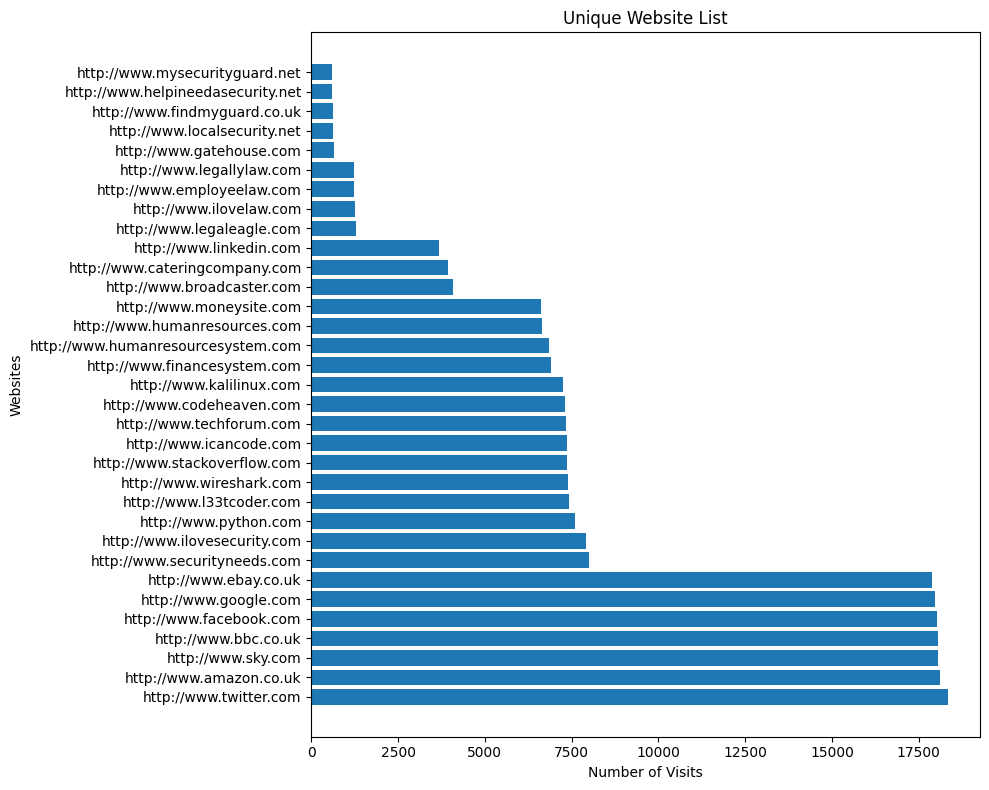

In [ ]:
list1 = web_data['website'].value_counts().reset_index(name='count')

plt.figure(figsize=(10, 8))
plt.barh(list1['website'], list1['count'])
plt.title('Unique Website List')
plt.xlabel('Number of Visits')
plt.ylabel('Websites')
plt.tight_layout()

plt.show()

In [ ]:
#do 2 graphs for this
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Look at the user

# Define the suspicious domains
suspicious_domains = [
    'http://www.securityneeds.com', 'http://www.ilovesecurity.com', 'http://www.kalilinux.com', 'http://www.wireshark.com',
    'http://www.helpineedasecurity.net', 'http://www.findmyguard.co.uk', 'http://www.mysecurityguard.net'
]

role = ['Technical', 'Legal', 'HR', 'Security', 'Services', 'Director', 'Finance']

#gets the roles from the employee data
role_employees = employee_data[employee_data['role'].isin(role)][['user', 'role']]
result = pd.merge(web_data, right= role_employees, on="user")



# # Check if the website is suspicious and count occurrences for each user
result['Suspicious'] = result['website'].isin(suspicious_domains)
suspicious_only_counts = result[result['Suspicious']].value_counts('role')
suspicious_only_counts


# Group all websites by role and count occurrences
all_websites_by_role = result.groupby('role')['website'].value_counts().reset_index(name='count')

# Display the top results
print(all_websites_by_role.head(100))


         role                       website  count
0    Director       http://www.amazon.co.uk   1160
1    Director        http://www.twitter.com   1128
2    Director       http://www.facebook.com   1096
3    Director          http://www.bbc.co.uk   1072
4    Director         http://www.ebay.co.uk   1065
..        ...                           ...    ...
89  Technical  http://www.ilovesecurity.com   7337
90  Technical      http://www.techforum.com   7324
91  Technical     http://www.codeheaven.com   7311
92  Technical         http://www.ebay.co.uk   7281
93  Technical      http://www.kalilinux.com   7243

[94 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

### Heatmap for websites visited by legal role

        user                     website  count
0    usr-jmh        http://www.bbc.co.uk    372
1    usr-jmh       http://www.ebay.co.uk    345
2    usr-jmh          http://www.sky.com    328
3    usr-jmh      http://www.twitter.com    322
4    usr-jmh       http://www.google.com    319
..       ...                         ...    ...
154  usr-kii       http://www.ebay.co.uk     72
155  usr-ylz     http://www.ilovelaw.com     71
156  usr-hcv       http://www.ebay.co.uk     70
157  usr-nua   http://www.legallylaw.com     70
158  usr-vwc  http://www.employeelaw.com     68

[159 rows x 3 columns]


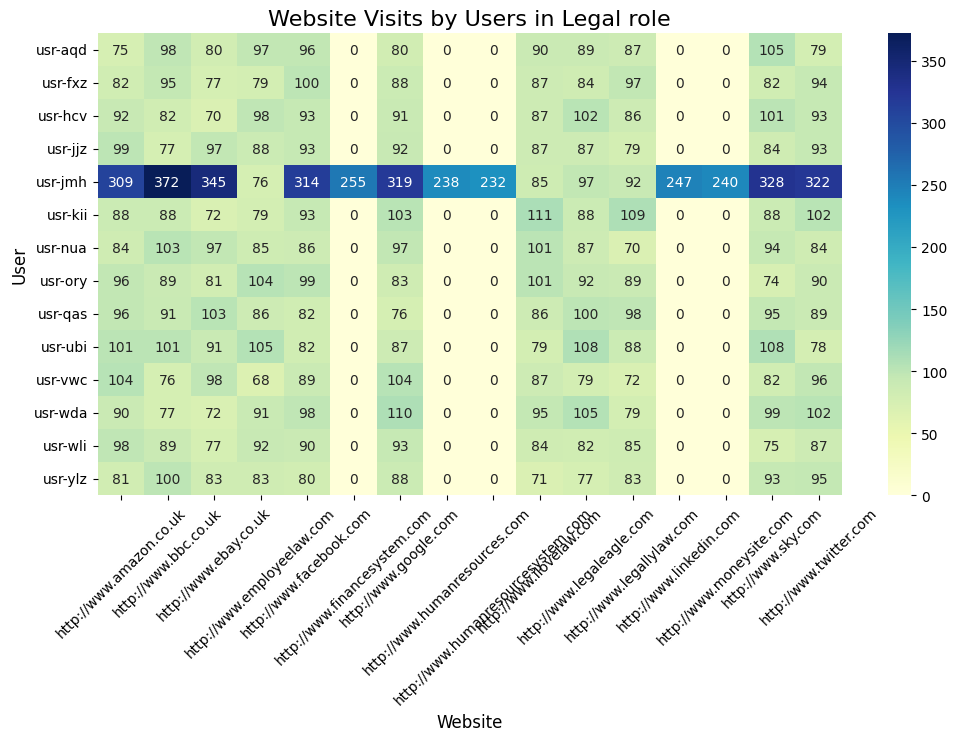

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
role_data = result[result['role'] == 'Legal'].value_counts(['user', 'website']).reset_index(name='count')

print(role_data)
heatmap = role_data.pivot_table(index='user', columns='website',values="count", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True, fmt="0.0f")


plt.title(f'Website Visits by Users in Legal role', fontsize=16)
plt.xlabel('Website', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Usr-jmh has really high activity of visiting websites.Also is the only one that visits certain ones

### Heatmap for website visits for HR users

        user                     website  count
0    usr-jmh        http://www.bbc.co.uk    372
1    usr-jmh       http://www.ebay.co.uk    345
2    usr-jmh          http://www.sky.com    328
3    usr-jmh      http://www.twitter.com    322
4    usr-jmh       http://www.google.com    319
..       ...                         ...    ...
191  usr-evb       http://www.google.com    194
192  usr-jmh   http://www.legaleagle.com     97
193  usr-jmh   http://www.legallylaw.com     92
194  usr-jmh     http://www.ilovelaw.com     85
195  usr-jmh  http://www.employeelaw.com     76

[196 rows x 3 columns]


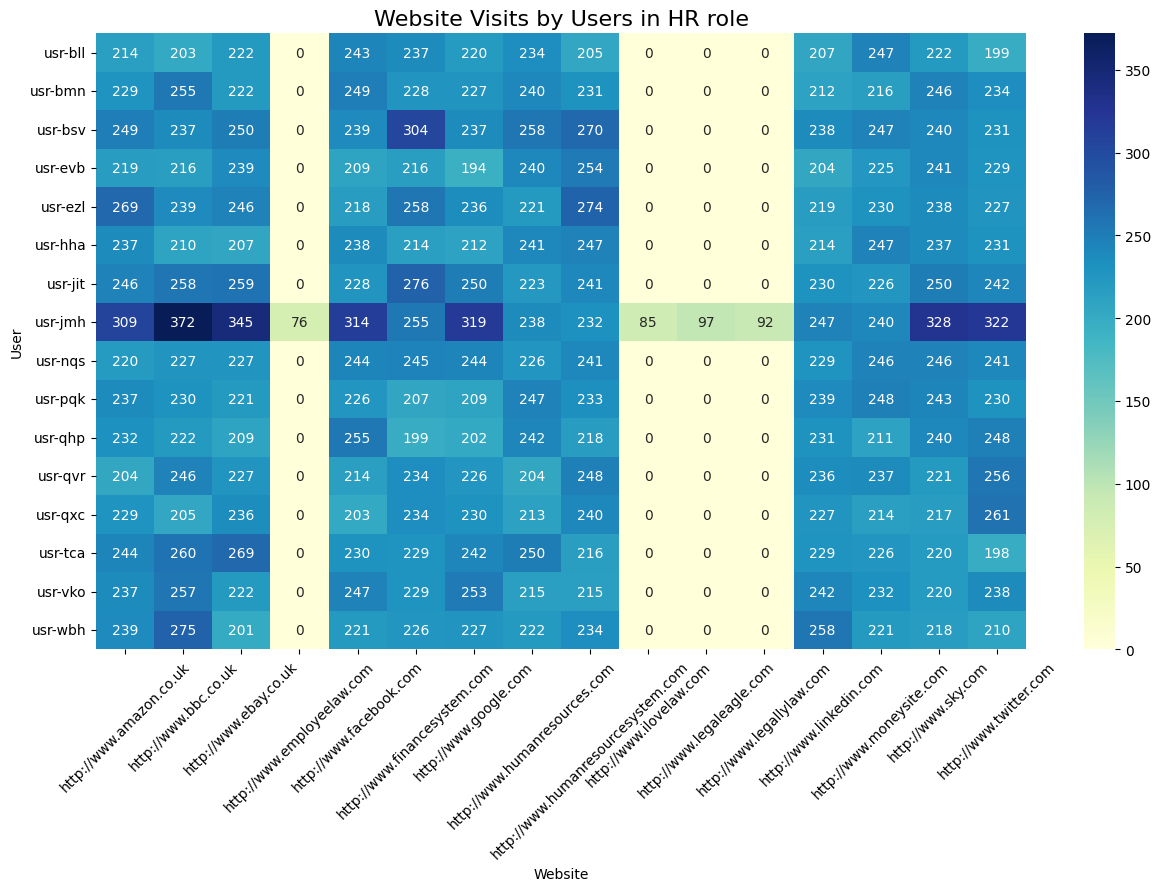

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
role_data = result[result['role'] == 'HR'].value_counts(['user', 'website']).reset_index(name='count')

print(role_data)
# Create a pivot table for the role
heatmap = role_data.pivot_table(index='user', columns='website',values="count", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True, fmt="0.0f")


# Add titles and labels
plt.title(f'Website Visits by Users in HR role', fontsize=16)
plt.xlabel('Website')
plt.ylabel('User')
plt.xticks(rotation=45)
plt.show()


Usr-jmh is the only user to visit websites :ebay,ilovelaw and legaleagle

### Heatmap for websites visited by security role

        user                         website  count
0    usr-dao           http://www.google.com     55
1    usr-ozn    http://www.localsecurity.net     54
2    usr-eqs           http://www.google.com     54
3    usr-pyb          http://www.twitter.com     53
4    usr-pqq    http://www.securityneeds.com     51
..       ...                             ...    ...
219  usr-gyv              http://www.sky.com     26
220  usr-eqs    http://www.securityneeds.com     26
221  usr-ozn  http://www.mysecurityguard.net     25
222  usr-gyv    http://www.localsecurity.net     25
223  usr-daf            http://www.bbc.co.uk     24

[224 rows x 3 columns]


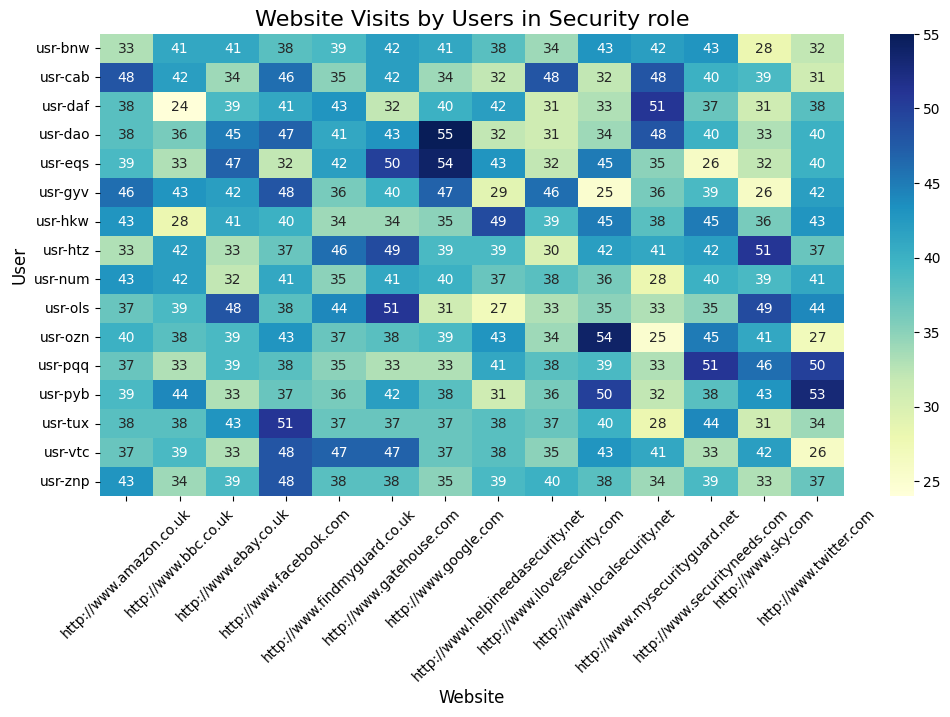

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

role_data = result[result['role'] == 'Security'].value_counts(['user', 'website']).reset_index(name='count')

print(role_data)
heatmap = role_data.pivot_table(index='user', columns='website',values="count", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True,fmt="0.0f")

plt.title(f'Website Visits by Users in Security role', fontsize=16)
plt.xlabel('Website', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Nothing suspicious here

        user                     website  count
0    usr-ljx  http://www.broadcaster.com    269
1    usr-ljx     http://www.facebook.com    260
2    usr-vac      http://www.twitter.com    260
3    usr-iqy    http://www.moneysite.com    260
4    usr-iqy      http://www.twitter.com    255
..       ...                         ...    ...
177  usr-oci       http://www.google.com    179
178  usr-jkp  http://www.broadcaster.com    178
179  usr-vzu          http://www.sky.com    176
180  usr-ljx       http://www.google.com    176
181  usr-ams       http://www.google.com    165

[182 rows x 3 columns]


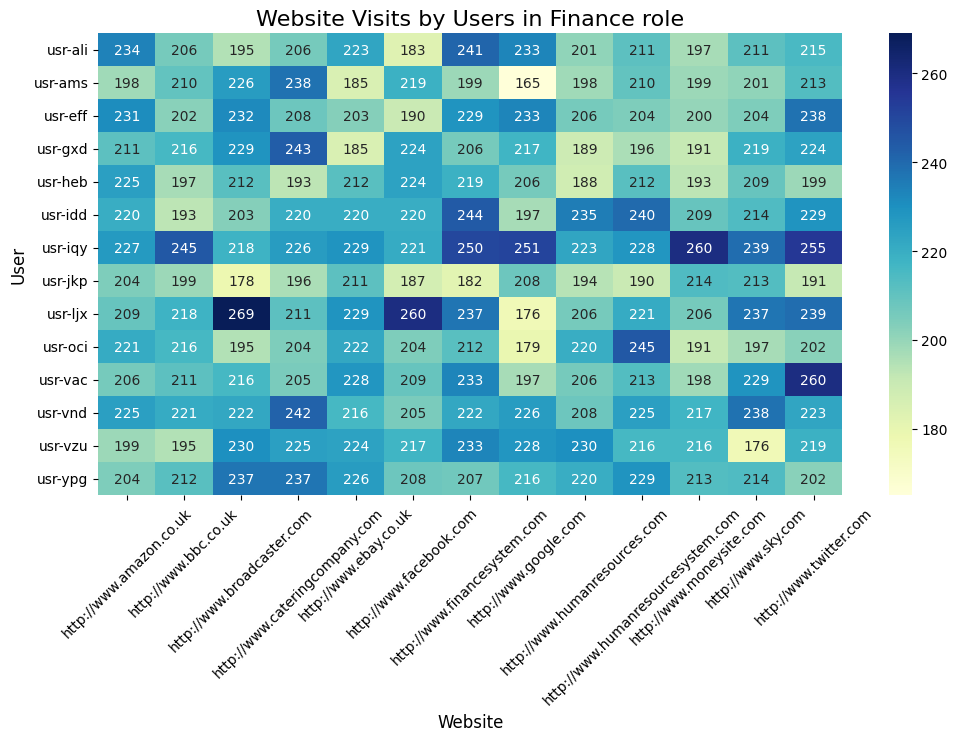

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

role_data = result[result['role'] == 'Finance'].value_counts(['user', 'website']).reset_index(name='count')

print(role_data)
heatmap = role_data.pivot_table(index='user', columns='website',values="count", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True,fmt="0.0f")

plt.title(f'Website Visits by Users in Finance role', fontsize=16)
plt.xlabel('Website', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()


No anamolous activity found here

### Heatmap for websites visited by Finance role

        user                         website  count
0    usr-ylm              http://www.sky.com     88
1    usr-pog           http://www.google.com     78
2    usr-qpx            http://www.bbc.co.uk     78
3    usr-lok      http://www.broadcaster.com     77
4    usr-pjl           http://www.ebay.co.uk     77
..       ...                             ...    ...
139  usr-qpx      http://www.broadcaster.com     46
140  usr-lok            http://www.bbc.co.uk     46
141  usr-lok         http://www.amazon.co.uk     46
142  usr-qpx  http://www.cateringcompany.com     45
143  usr-mgv          http://www.twitter.com     39

[144 rows x 3 columns]


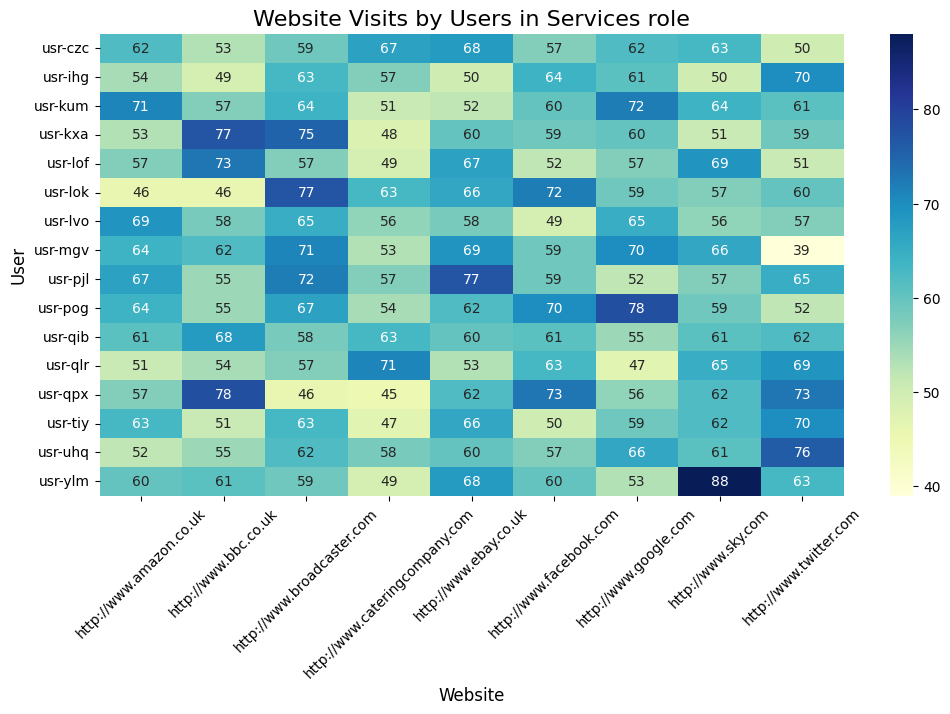

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

role_data = result[result['role'] == 'Services'].value_counts(['user', 'website']).reset_index(name='count')

print(role_data)
heatmap = role_data.pivot_table(index='user', columns='website',values="count", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True,fmt="0.0f")

plt.title(f'Website Visits by Users in Services role', fontsize=16)
plt.xlabel('Website', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()


High count for sky.com for usr-ylm however this is not suspicious activity.

### Heatmap for websites visited by Technical role

        user                    website  count
0    usr-bcc   http://www.kalilinux.com    819
1    usr-bcc     http://www.twitter.com    811
2    usr-jwl      http://www.python.com    808
3    usr-bcc         http://www.sky.com    807
4    usr-gpq      http://www.python.com    806
..       ...                        ...    ...
165  usr-biy   http://www.kalilinux.com    690
166  usr-tir  http://www.codeheaven.com    685
167  usr-tir    http://www.icancode.com    670
168  usr-tir   http://www.l33tcoder.com    659
169  usr-tir   http://www.kalilinux.com    658

[170 rows x 3 columns]


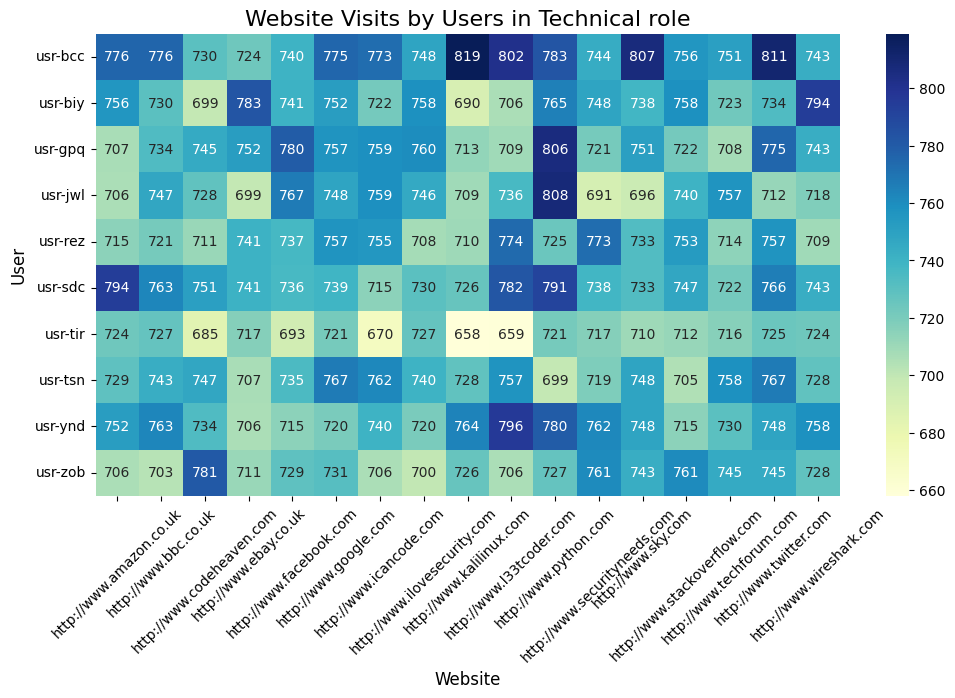

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

role_data = result[result['role'] == 'Technical'].value_counts(['user', 'website']).reset_index(name='count')

print(role_data)
heatmap = role_data.pivot_table(index='user', columns='website',values="count", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True,fmt="0.0f")

plt.title(f'Website Visits by Users in Technical role', fontsize=16)
plt.xlabel('Website', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()


No anamalous activity here

### Heatmap for websites visited by Director role

       user                    website  count
0   usr-dvz    http://www.facebook.com     94
1   usr-nqf      http://www.google.com     94
2   usr-qrq    http://www.amazon.co.uk     93
3   usr-feq    http://www.amazon.co.uk     93
4   usr-dga       http://www.bbc.co.uk     90
..      ...                        ...    ...
95  usr-nqf         http://www.sky.com     64
96  usr-qrq       http://www.bbc.co.uk     60
97  usr-dvz      http://www.ebay.co.uk     59
98  usr-jde  http://www.legaleagle.com      5
99  usr-jde    http://www.linkedin.com      5

[100 rows x 3 columns]


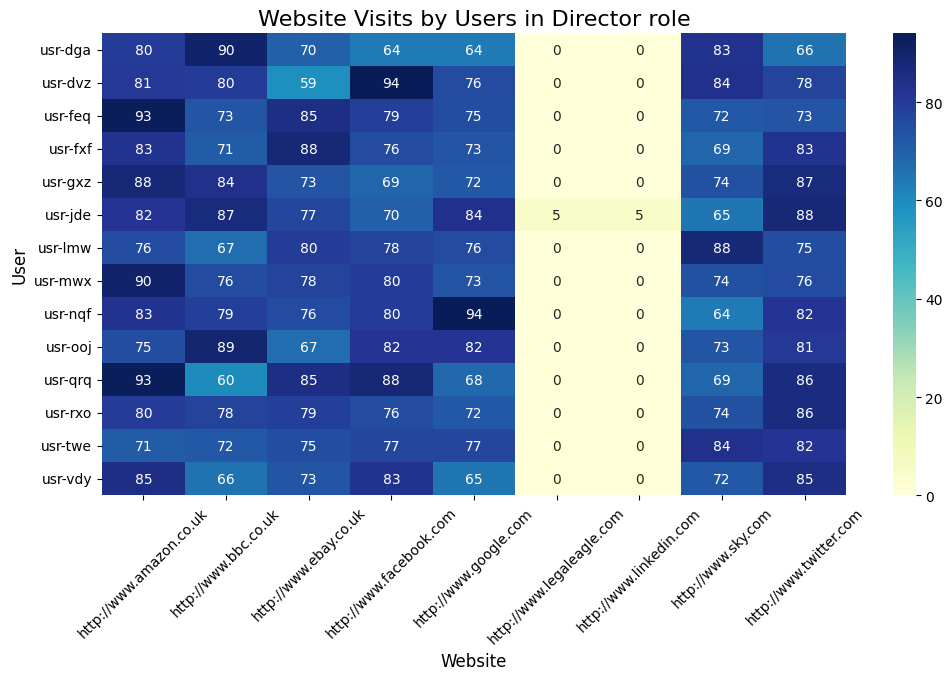

                         datetime     user                    website
141659 2018-04-14 11:21:56.997966  usr-jde  http://www.legaleagle.com
142040 2018-04-14 14:17:59.535525  usr-jde  http://www.legaleagle.com
142129 2018-04-14 15:04:17.963795  usr-jde  http://www.legaleagle.com
142212 2018-04-14 16:05:06.757264  usr-jde  http://www.legaleagle.com
142403 2018-04-14 18:46:29.644845  usr-jde  http://www.legaleagle.com
                         datetime     user                  website
142147 2018-04-14 15:16:12.172183  usr-jde  http://www.linkedin.com
142374 2018-04-14 18:08:29.873496  usr-jde  http://www.linkedin.com
142377 2018-04-14 18:13:40.213110  usr-jde  http://www.linkedin.com
142408 2018-04-14 18:51:02.520569  usr-jde  http://www.linkedin.com
142429 2018-04-14 19:15:43.231127  usr-jde  http://www.linkedin.com


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

role_data = result[result['role'] == 'Director'].value_counts(['user', 'website']).reset_index(name='count')

print(role_data)
heatmap = role_data.pivot_table(index='user', columns='website',values="count", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, cmap='YlGnBu', annot=True,fmt="0.0f")

plt.title(f'Website Visits by Users in Director role', fontsize=16)
plt.xlabel('Website', fontsize=12)
plt.ylabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()

usr_jde_web_activity_legal =web_data[(web_data['user'] == 'usr-jde') & (web_data['website'] == 'http://www.legaleagle.com')]
print(usr_jde_web_activity_legal)

usr_jde_web_activity_linkedin=web_data[(web_data['user'] == 'usr-jde') & (web_data['website'] == 'http://www.linkedin.com')]
print(usr_jde_web_activity_linkedin)


Usr-jde is the only that accesses legaleagle.com and linkedin.com 5 times.This is anamolous activity.This happens all on 14th April.

## Email data

### Checks if they have the right ending of the email in sender and reciepient


In [ ]:
filtered_sender = email_data['sender'].str.endswith('@technova-innovations.net', na=False)
filtered_recipient = email_data['recipient'].str.endswith('@technova-innovations.net', na=False)

if filtered_sender.all():
    print("All sender email domains are technova-innovations.net")
else:
    print("Some sender email domains are not technova-innovations.net")
    print(email_data[~filtered_sender])

if filtered_recipient.all():
    print("All recipient email domains are technova-innovations.net")
    print(email_data[filtered_recipient])

All sender email domains are technova-innovations.net
All recipient email domains are technova-innovations.net
                         datetime                            sender  \
0      2018-01-01 00:41:45.500091  usr-vdy@technova-innovations.net   
1      2018-01-01 01:27:00.883256  usr-vdy@technova-innovations.net   
2      2018-01-01 02:09:41.590869  usr-vdy@technova-innovations.net   
3      2018-01-01 02:32:49.851613  usr-eqs@technova-innovations.net   
4      2018-01-01 02:38:44.793534  usr-eqs@technova-innovations.net   
...                           ...                               ...   
575850 2018-06-30 23:18:20.623673  usr-bcc@technova-innovations.net   
575851 2018-06-30 23:19:42.517566  usr-tir@technova-innovations.net   
575852 2018-06-30 23:21:39.006578  usr-pqq@technova-innovations.net   
575853 2018-06-30 23:40:05.030894  usr-bcc@technova-innovations.net   
575854 2018-06-30 23:45:50.611454  usr-pqq@technova-innovations.net   

                               recip

No mismatched domains from either sender and recipient emails

### checks the roles of recipents and senders

Index(['datetime', 'sender', 'recipient'], dtype='object')


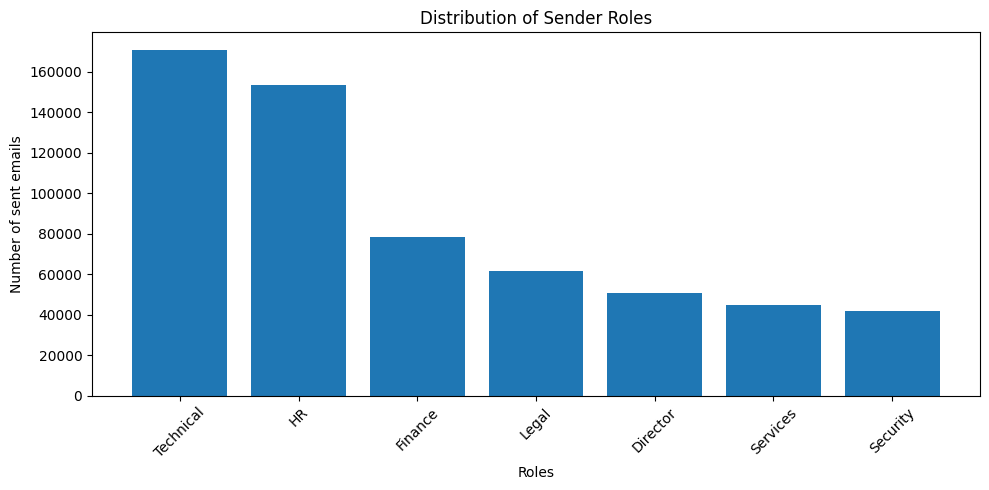

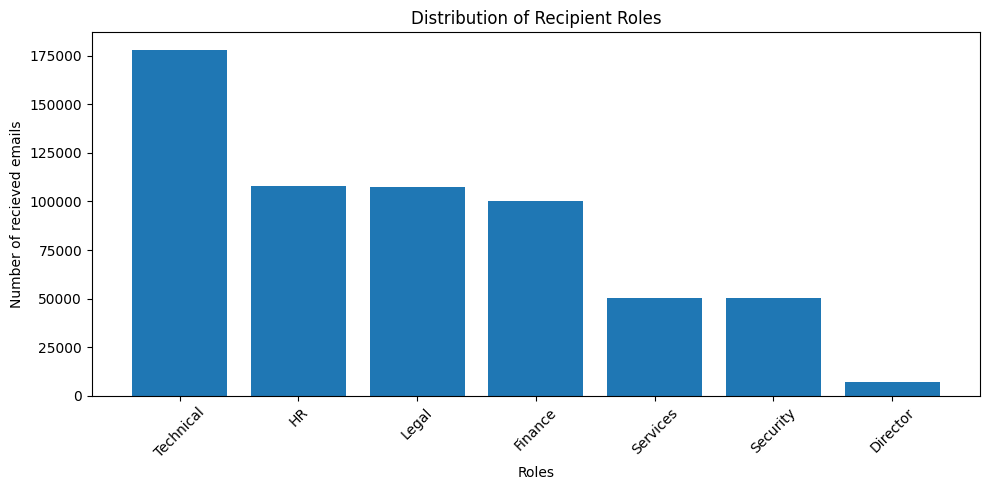

In [ ]:
import matplotlib.pyplot as plt

print(email_data.columns)


employee_data2 = employee_data[['email', 'role']]
new_email_data = email_data.merge(employee_data2, left_on='sender', right_on='email', how='left')
new_email_data = new_email_data.drop(columns=['email'])
new_email_data = new_email_data.merge(employee_data2, left_on='recipient', right_on='email', how='left')  # Merge based on 'recipient' and 'email'
new_email_data = new_email_data.drop(columns=['email'])
new_email_data

# #based on sender_role count it
sender_role_counts = new_email_data['role_x'].value_counts().reset_index()
sender_role_counts.columns = ['sender_role', 'count']
recipient_role_counts = new_email_data['role_y'].value_counts().reset_index()
recipient_role_counts.columns = ['recipient_role', 'count']

# sender_role_counts
# # Plot the sender roles
plt.figure(figsize=(10, 5))
plt.bar(sender_role_counts['sender_role'], sender_role_counts['count'])
plt.title("Distribution of Sender Roles")
plt.xlabel("Roles")
plt.ylabel("Number of sent emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # Plot the recipient roles
plt.figure(figsize=(10, 5))
plt.bar(recipient_role_counts['recipient_role'], recipient_role_counts['count'])
plt.title("Distribution of Recipient Roles")
plt.xlabel("Roles")
plt.ylabel("Number of recieved emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Technical role is the highest role that sends and recieves emails

### Check the employee_data corresponds with the email data


In [ ]:
email_data['sender_matches'] = email_data['sender'].isin(employee_data['email'])
email_data['recipient_matches'] = email_data['recipient'].isin(employee_data['email'])

sender_matches=email_data[email_data['sender_matches']==False]
recipient_matches=email_data[email_data['recipient_matches']==False]
print("Mismatched sender emails from employee_data and email_data:")
print(sender_matches)
print("Mismatched recipient emails from employee_data and email_data:")
print(recipient_matches)

Mismatched sender emails from employee_data and email_data:
Empty DataFrame
Columns: [datetime, sender, recipient, sender_matches, recipient_matches]
Index: []
Mismatched recipient emails from employee_data and email_data:
Empty DataFrame
Columns: [datetime, sender, recipient, sender_matches, recipient_matches]
Index: []


No mismatched domain names-nothing suspicious

---



Get the most sender-recipent pair and the least recipient paors

In [ ]:
# Count the frequency of sender-recipient pairs
pair_counts = email_data.groupby(['sender', 'recipient']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Find the sender-recipient pair with the fewest emails
min_pair_row = pair_counts.loc[pair_counts['count'].idxmin()]
max_pair_row = pair_counts.loc[pair_counts['count'].idxmax()]

# Print the results
print("Sender-Recipient Pair with Fewest Emails:", min_pair_row)
print("Sender-Recipient Pair with Most Emails:", max_pair_row)

#get their roles too from employee_data
pair_counts.head(10)

Sender-Recipient Pair with Fewest Emails: sender       usr-gxz@technova-innovations.net
recipient    usr-dao@technova-innovations.net
count                                      14
Name: 1103, dtype: object
Sender-Recipient Pair with Most Emails: sender       usr-jwl@technova-innovations.net
recipient    usr-zob@technova-innovations.net
count                                    1814
Name: 1813, dtype: object


sender                         recipient  \
1813  usr-jwl@technova-innovations.net  usr-zob@technova-innovations.net   
3302  usr-rez@technova-innovations.net  usr-ynd@technova-innovations.net   
3303  usr-rez@technova-innovations.net  usr-zob@technova-innovations.net   
1806  usr-jwl@technova-innovations.net  usr-gpq@technova-innovations.net   
1041  usr-gpq@technova-innovations.net  usr-jwl@technova-innovations.net   
1807  usr-jwl@technova-innovations.net  usr-jwl@technova-innovations.net   
1042  usr-gpq@technova-innovations.net  usr-rez@technova-innovations.net   
3458  usr-tir@technova-innovations.net  usr-gpq@technova-innovations.net   
1047  usr-gpq@technova-innovations.net  usr-zob@technova-innovations.net   
1812  usr-jwl@technova-innovations.net  usr-ynd@technova-innovations.net   

      count  
1813   1814  
3302   1812  
3303   1803  
1806   1800  
1041   1797  
1807   1796  
1042   1794  
3458   1793  
1047   1788  
1812   1777

Find the roles of the most and the least exchanges

In [ ]:
#get role of the highest
usr_dao_role=employee_data[employee_data['user']== 'usr-dao']['role']
usr_gxz_role=employee_data[employee_data['user']== 'usr-gxz']['role']
usr_zob_role=employee_data[employee_data['user']== 'usr-zob']['role']
usr_jwl_role=employee_data[employee_data['user']== 'usr-jwl']['role']
print("Usr_dao (sender) role is:",usr_dao_role)
print("Usr-gxz (recipient) role is :",usr_gxz_role)
print("Usr-zob (sender) role is :",usr_zob_role)
print("Usr-jwl (recipient) role is :",usr_jwl_role)




Usr_dao (sender) role is: 47    Security
Name: role, dtype: object
Usr-gxz (recipient) role is : 66    Director
Name: role, dtype: object
Usr-zob (sender) role is : 74    Technical
Name: role, dtype: object
Usr-jwl (recipient) role is : 71    Technical
Name: role, dtype: object


Nothing suspicious here as the most frequent pair is technical which is normal as they sent and recieve the most emails to each other.


### checks usr-jmh activity

In [ ]:
specific_users = ['usr-jmh@technova-innovations.net']
# Filter specific sender-recipient pairs
specific_pairs = email_data[
    (email_data['sender'].isin(specific_users))
].copy()
#get the roles next to the recipient

print("Sender-Recipient Pairs for usr-jmh:")
specific_pairs.head(10)




Sender-Recipient Pairs for usr-jmh:


datetime                            sender  \
569 2018-01-01 09:37:44.771393  usr-jmh@technova-innovations.net   
591 2018-01-01 09:43:04.619599  usr-jmh@technova-innovations.net   
599 2018-01-01 09:45:20.048268  usr-jmh@technova-innovations.net   
602 2018-01-01 09:45:53.423690  usr-jmh@technova-innovations.net   
637 2018-01-01 09:51:32.775845  usr-jmh@technova-innovations.net   
665 2018-01-01 09:56:55.457580  usr-jmh@technova-innovations.net   
697 2018-01-01 10:02:45.907781  usr-jmh@technova-innovations.net   
716 2018-01-01 10:05:34.201675  usr-jmh@technova-innovations.net   
782 2018-01-01 10:16:37.806039  usr-jmh@technova-innovations.net   
791 2018-01-01 10:18:53.498119  usr-jmh@technova-innovations.net   

                            recipient  sender_matches  recipient_matches  
569  usr-heb@technova-innovations.net            True               True  
591  usr-bmn@technova-innovations.net            True               True  
599  usr-bsv@technova-innovations.net            True               True  
602  usr-ypg@technova-innovations.net            True               True  
637  usr-jkp@technova-innovations.net            True               True  
665  usr-ypg@technova-innovations.net            True               True  
697  usr-jmh@technova-innovations.net            True               True  
716  usr-vwc@technova-innovations.net            True               True  
782  usr-vko@technova-innovations.net            True               True  
791  usr-vko@technova-innovations.net            True               True

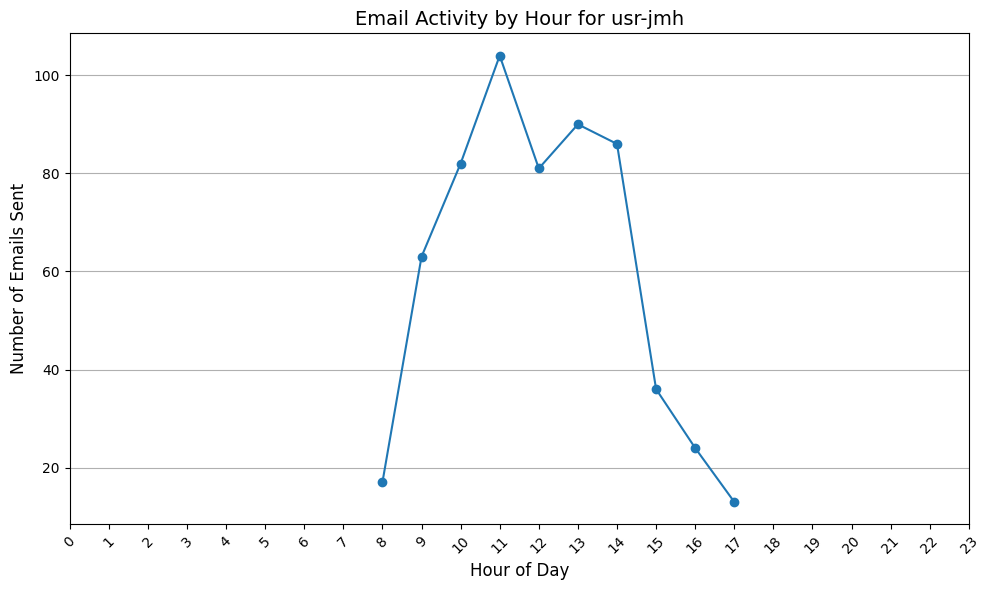

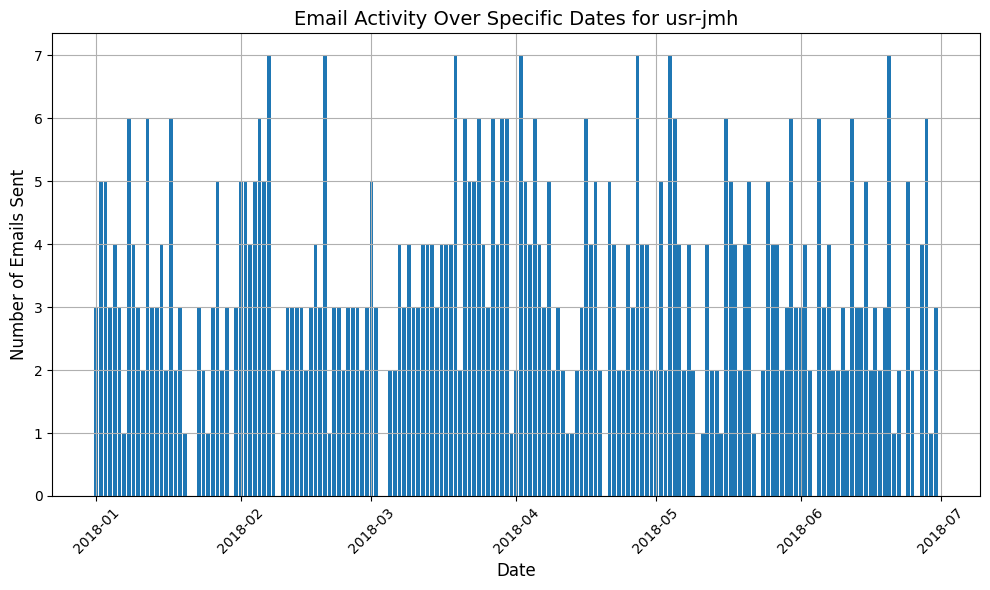

In [ ]:
users = ['usr-jmh@technova-innovations.net']

# Filter specific sender-recipient pairs and create a copy
pairs = email_data[
    (email_data['sender'].isin(users)) & (email_data['recipient'].isin(users))
].copy()

# Convert 'datetime' column to datetime format
pairs['datetime'] = pd.to_datetime(pairs['datetime'])

pairs['hour'] = pairs['datetime'].dt.hour
hourly = pairs['hour'].value_counts().sort_index().reset_index(name='email_count')
hourly.columns = ['hour', 'email_count']

# Plot hourly email activity
plt.figure(figsize=(10, 6))
plt.plot(hourly['hour'], hourly['email_count'], marker='o')
plt.title('Email Activity by Hour for usr-jmh', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Emails Sent', fontsize=12)
plt.xticks(range(0, 24), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

pairs['date'] = pairs['datetime'].dt.date
daily_activity= pairs['date'].value_counts().sort_index().reset_index(name='email_count_daily')

# Plot daily email activity
plt.figure(figsize=(10, 6))
plt.bar(daily_activity['date'], daily_activity['email_count_daily'])
plt.title('Email Activity Over Specific Dates for usr-jmh', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Emails Sent', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Get the highest frequency date where Usr-jmh sends emails to themselves

In [ ]:
# Find the date with the most emails sent
most_sent_day = daily_activity.loc[daily_activity['email_count_daily'].idxmax()]

print(f"The day with the most emails sent is: {most_sent_day['date']}")
print(f"Number of emails sent on this day: {most_sent_day['email_count_daily']}")




The day with the most emails sent is: 2018-02-07
Number of emails sent on this day: 7


Check the email activity for that day

In [ ]:
#get the datetime for 2018-02-07 information
#pairs  use dataframe as it is for usr-jmh

pairs['date'] = pairs['datetime'].dt.date
#get the equivalent date
pairs= pairs[pairs['date'] == pd.Timestamp('2018-02-07').date()]
print(pairs.head(10))



                         datetime                            sender  \
118815 2018-02-07 11:16:41.778944  usr-jmh@technova-innovations.net   
118830 2018-02-07 11:19:12.633932  usr-jmh@technova-innovations.net   
119187 2018-02-07 12:22:06.649096  usr-jmh@technova-innovations.net   
119578 2018-02-07 13:26:57.244817  usr-jmh@technova-innovations.net   
119648 2018-02-07 13:40:06.422572  usr-jmh@technova-innovations.net   
119692 2018-02-07 13:47:16.051947  usr-jmh@technova-innovations.net   
120261 2018-02-07 15:35:25.919990  usr-jmh@technova-innovations.net   

                               recipient  sender_matches  recipient_matches  \
118815  usr-jmh@technova-innovations.net            True               True   
118830  usr-jmh@technova-innovations.net            True               True   
119187  usr-jmh@technova-innovations.net            True               True   
119578  usr-jmh@technova-innovations.net            True               True   
119648  usr-jmh@technova-innovations

Usr-jmh has been sending emails to themselves in short time intervals on 7th Feburary 2018 at times:11:16,11:19,13:40&13:47

---



### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words.


Please make clear which dataset you have used for your investigation.


#### (10 marks)

Used the TechNovaInnovations Dataset.
The investigation shows usr-jmh and usr-jde as suspects due to having anamolous activities across the data files.

In employee_data, Usr-jmh is a duplicate user with the same email across different PCs with multiple roles (HR and Legal).This indicates a sign of privilege misuse to gain unauthorised access to sensitive files and other parts of the system ,further exploiting vulnerabilities.

In login_data,Login and logoff times were investigated for each role using bar charts and heatmaps.This revealed HR and legal users have some hours of low login activities. In HR-role ,usr-jmh frequently logged in at 9am and was the only user logged out at 5pm. In Legal-role, usr-jmh logged out frequently between 2pm and 3pm ,and was the only user logging in at 8am.This activity could indicate the user is accessing the system out of hours to stay undetected.

In email data, usr-jmh exhibited unusual behavior by sending emails to themselves.It has the highest frequency of self-emails sent on 7th Feburary,2018 in short time intervals of times (11:16,11:19,13:40&13:47).This is unusual for the roles they are in as they could be sending data files to themselves.They might be to test ways to get into the system.

For file_data, access outside role-specific hours was identified using stacked bar charts.This revealed Director,HR,Legal and Services as suspicious .Using heatmaps,usr-jmh showed unusually high access to sensitive files like /docs/clients and /docs/ip ,/docs/employment and /private. Usr-jde,the  only director, accessed /docs/clients all on April 9th.This indicates misuse of permission as they are the only one accessing that file.

For USB data files, usr-jmh had the highest USB activity when switching between different PCs.Therefore, this demonstrates suspicious file transmission avoidance.Usr-jde had a suspiciously low USB activity all concentrated on two days (April 12th and April 14th).On April 14th at 12:30 , USB was inserted and removed in 2 mins,and irregular USB activity throughout the day.This indicates usr-jde is transferring files without authorisation especially with its small time frame and its rapid USB activity.This implies they stored the files on the USB they accessed on April 9th which demonstrates the quick transfers.

Website_data: usr-jmh had very high website activity compared to those in HR and legal roles.Accessed these sites that others don't: http://www.ebay.co.uk, http://www.ilovelaw.com, and http://www.legaleagle.com .Ebay is not a suspicious website.Usr-jde is the only Director who accessed http://www.legaleagle.com and http://www.linkedin.com multiple times, all on April 14th, 2018.These websites are legal and job searching websites; they may be preparing incase they get caught as this is the last anamolous date, or they could be contacting other companies to sell the data.




